In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, sklearn, collections, itertools, math

%matplotlib inline
from matplotlib import pyplot
matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)


# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)

pandas.set_option('display.max_columns', 500)


def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
sources = pandas.read_csv("../data/sources.csv", index_col="source_id")
sources["source_id"] = sources.index
sources = sources.ix[sources.cohort == "AOCS"]
timepoint_paired_donors = set(d for d in sources.donor
                              if len(sources.ix[sources.donor == d].timepoint.unique()) > 1 )
timepoint_paired_donors
sources["timepoint_paired"] = sources.donor.isin(timepoint_paired_donors)
sources

donor cohort library treated   timepoint metastasis  \
source_id                                                                      
AOCS-001-1/SP101515   AOCS-001   AOCS     WGS   False     primary      False   
AOCS-002-1/SP101517   AOCS-002   AOCS     WGS   False     primary      False   
AOCS-004-1/SP101519   AOCS-004   AOCS     WGS   False     primary      False   
AOCS-005-1/SP101521   AOCS-005   AOCS     WGS   False     primary      False   
AOCS-034-13/SP101524  AOCS-034   AOCS     WGS    True  recurrence      False   
AOCS-034-1/SP101523   AOCS-034   AOCS     WGS   False     primary      False   
AOCS-055-1/SP101526   AOCS-055   AOCS     WGS   False     primary      False   
AOCS-056-1/SP101528   AOCS-056   AOCS     WGS   False     primary      False   
AOCS-057-1/SP101530   AOCS-057   AOCS     WGS   False     primary      False   
AOCS-058-1/SP101532   AOCS-058   AOCS     WGS   False     primary      False   
AOCS-059-1/SP101536   AOCS-059   AOCS     WGS   False     primary      False   
AOCS-060-1/SP101540   AOCS-060   AOCS     WGS   False     primary      False   
AOCS-061-1/SP101544   AOCS-061   AOCS     WGS   False     primary      False   
AOCS-063-1/SP101548   AOCS-063   AOCS     WGS   False     primary      False   
AOCS-064-13/SP101554  AOCS-064   AOCS     WGS    True  recurrence      False   
AOCS-064-1/SP101552   AOCS-064   AOCS     WGS   False     primary      False   
AOCS-065-13/SP101560  AOCS-065   AOCS     WGS    True  recurrence      False   
AOCS-065-1/SP101558   AOCS-065   AOCS     WGS   False     primary      False   
AOCS-075-1/SP101564   AOCS-075   AOCS     WGS   False     primary      False   
AOCS-076-1/SP101568   AOCS-076   AOCS     WGS   False     primary      False   
AOCS-077-1/SP101572   AOCS-077   AOCS     WGS    True     primary      False   
AOCS-078-1/SP101576   AOCS-078   AOCS     WGS   False     primary      False   
AOCS-079-1/SP101580   AOCS-079   AOCS     WGS   False     primary      False   
AOCS-080-1/SP101584   AOCS-080   AOCS     WGS   False     primary      False   
AOCS-081-1/SP101588   AOCS-081   AOCS     WGS   False     primary      False   
AOCS-083-1/SP101592   AOCS-083   AOCS     WGS   False     primary      False   
AOCS-084-1/SP101596   AOCS-084   AOCS     WGS   False     primary      False   
AOCS-085-1/SP101600   AOCS-085   AOCS     WGS   False     primary      False   
AOCS-086-1/SP101604   AOCS-086   AOCS     WGS   False     primary      False   
AOCS-086-13/SP101606  AOCS-086   AOCS     WGS    True  recurrence      False   
...                        ...    ...     ...     ...         ...        ...   
AOCS-144-1/SP101951   AOCS-144   AOCS     WGS   False     primary      False   
AOCS-145-1/SP101961   AOCS-145   AOCS     WGS   False     primary      False   
AOCS-146-1/SP101971   AOCS-146   AOCS     WGS   False     primary      False   
AOCS-147-1/SP101981   AOCS-147   AOCS     WGS   False     primary      False   
AOCS-148-1/SP101990   AOCS-148   AOCS     WGS   False     primary      False   
AOCS-149-1/SP102000   AOCS-149   AOCS     WGS   False     primary      False   
AOCS-150-13/SP102010  AOCS-150   AOCS     WGS    True  recurrence      False   
AOCS-150-14/SP102015  AOCS-150   AOCS     WGS    True  recurrence      False   
AOCS-152-1/SP102025   AOCS-152   AOCS     WGS   False     primary      False   
AOCS-153-1/SP102035   AOCS-153   AOCS     WGS   False     primary      False   
AOCS-155-13/SP102045  AOCS-155   AOCS     WGS    True  recurrence      False   
AOCS-157-1/SP102055   AOCS-157   AOCS     WGS   False     primary      False   
AOCS-158-1/SP102064   AOCS-158   AOCS     WGS    True     primary      False   
AOCS-159-1/SP102074   AOCS-159   AOCS     WGS   False     primary      False   
AOCS-160-1/SP102084   AOCS-160   AOCS     WGS   False     primary      False   
AOCS-161-1/SP102090   AOCS-161   AOCS     WGS   False     primary      False   
AOCS-162-1/SP102096   AOCS-162   AOCS     WGS    True     primary      False   
AOCS-163-1/SP102103   AOC

In [3]:
mutations = pandas.read_csv("../data/mutations.csv.bz2", converters={'binding_peptides': eval})

mutations["indel"] = mutations.ref.str.len() != mutations.alt.str.len()
#mutations["interesting"] = (mutations.context_mutation_3p5p == "C(C>A)C").astype(float)
mutations["interesting"] = (mutations.context_mutation == "C>A").astype(float)

mutations["interesting"].mean()

muts_confident = mutations.ix[
    (mutations.called == 1) | (mutations.dna_alt_reads > 10)
]


/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
sources["protein changing"] = muts_confident.ix[
    (mutations.effect.str.startswith("p."))
].groupby("source_id").donor.count().to_frame()["donor"]

sources["peptides"] = muts_confident.groupby("source_id").num_binders.sum().to_frame()["num_binders"]

sources["expressed peptides"] = muts_confident.ix[
    (muts_confident.rna_alt_reads > 2)
].groupby("source_id").num_binders.sum().to_frame()["num_binders"]


sources["mutations"] = muts_confident.groupby("source_id").donor.count().to_frame()["donor"]
sources["mutations_per_mb"] = sources.mutations * 1e6 / sources.library.map(library_sizes)

sources["indel"] = muts_confident.ix[
    muts_confident.indel
].groupby("source_id").donor.count().to_frame()["donor"]
sources.indel = sources.indel.fillna(0)

sources["interesting mutations"] = muts_confident.groupby("source_id").interesting.mean().to_frame()["interesting"] * 100.0

sources["group"] = sources.cohort + " " + sources.tissue_type
sources["treatment"] = sources.treated.map({True: "chemo treated", False: "treatment naive"})

sources["fraction_peptides_expressed"] = sources["expressed peptides"] / sources["peptides"]


sources

donor cohort library treated   timepoint metastasis  \
source_id                                                                      
AOCS-001-1/SP101515   AOCS-001   AOCS     WGS   False     primary      False   
AOCS-002-1/SP101517   AOCS-002   AOCS     WGS   False     primary      False   
AOCS-004-1/SP101519   AOCS-004   AOCS     WGS   False     primary      False   
AOCS-005-1/SP101521   AOCS-005   AOCS     WGS   False     primary      False   
AOCS-034-13/SP101524  AOCS-034   AOCS     WGS    True  recurrence      False   
AOCS-034-1/SP101523   AOCS-034   AOCS     WGS   False     primary      False   
AOCS-055-1/SP101526   AOCS-055   AOCS     WGS   False     primary      False   
AOCS-056-1/SP101528   AOCS-056   AOCS     WGS   False     primary      False   
AOCS-057-1/SP101530   AOCS-057   AOCS     WGS   False     primary      False   
AOCS-058-1/SP101532   AOCS-058   AOCS     WGS   False     primary      False   
AOCS-059-1/SP101536   AOCS-059   AOCS     WGS   False     primary      False   
AOCS-060-1/SP101540   AOCS-060   AOCS     WGS   False     primary      False   
AOCS-061-1/SP101544   AOCS-061   AOCS     WGS   False     primary      False   
AOCS-063-1/SP101548   AOCS-063   AOCS     WGS   False     primary      False   
AOCS-064-13/SP101554  AOCS-064   AOCS     WGS    True  recurrence      False   
AOCS-064-1/SP101552   AOCS-064   AOCS     WGS   False     primary      False   
AOCS-065-13/SP101560  AOCS-065   AOCS     WGS    True  recurrence      False   
AOCS-065-1/SP101558   AOCS-065   AOCS     WGS   False     primary      False   
AOCS-075-1/SP101564   AOCS-075   AOCS     WGS   False     primary      False   
AOCS-076-1/SP101568   AOCS-076   AOCS     WGS   False     primary      False   
AOCS-077-1/SP101572   AOCS-077   AOCS     WGS    True     primary      False   
AOCS-078-1/SP101576   AOCS-078   AOCS     WGS   False     primary      False   
AOCS-079-1/SP101580   AOCS-079   AOCS     WGS   False     primary      False   
AOCS-080-1/SP101584   AOCS-080   AOCS     WGS   False     primary      False   
AOCS-081-1/SP101588   AOCS-081   AOCS     WGS   False     primary      False   
AOCS-083-1/SP101592   AOCS-083   AOCS     WGS   False     primary      False   
AOCS-084-1/SP101596   AOCS-084   AOCS     WGS   False     primary      False   
AOCS-085-1/SP101600   AOCS-085   AOCS     WGS   False     primary      False   
AOCS-086-1/SP101604   AOCS-086   AOCS     WGS   False     primary      False   
AOCS-086-13/SP101606  AOCS-086   AOCS     WGS    True  recurrence      False   
...                        ...    ...     ...     ...         ...        ...   
AOCS-144-1/SP101951   AOCS-144   AOCS     WGS   False     primary      False   
AOCS-145-1/SP101961   AOCS-145   AOCS     WGS   False     primary      False   
AOCS-146-1/SP101971   AOCS-146   AOCS     WGS   False     primary      False   
AOCS-147-1/SP101981   AOCS-147   AOCS     WGS   False     primary      False   
AOCS-148-1/SP101990   AOCS-148   AOCS     WGS   False     primary      False   
AOCS-149-1/SP102000   AOCS-149   AOCS     WGS   False     primary      False   
AOCS-150-13/SP102010  AOCS-150   AOCS     WGS    True  recurrence      False   
AOCS-150-14/SP102015  AOCS-150   AOCS     WGS    True  recurrence      False   
AOCS-152-1/SP102025   AOCS-152   AOCS     WGS   False     primary      False   
AOCS-153-1/SP102035   AOCS-153   AOCS     WGS   False     primary      False   
AOCS-155-13/SP102045  AOCS-155   AOCS     WGS    True  recurrence      False   
AOCS-157-1/SP102055   AOCS-157   AOCS     WGS   False     primary      False   
AOCS-158-1/SP102064   AOCS-158   AOCS     WGS    True     primary      False   
AOCS-159-1/SP102074   AOCS-159   AOCS     WGS   False     primary      False   
AOCS-160-1/SP102084   AOCS-160   AOCS     WGS   False     primary      False   
AOCS-161-1/SP102090   AOCS-161   AOCS     WGS   False     primary      False   
AOCS-162-1/SP102096   AOCS-162   AOCS     WGS    True     primary      False   
AOCS-163-1/SP102103   AOC

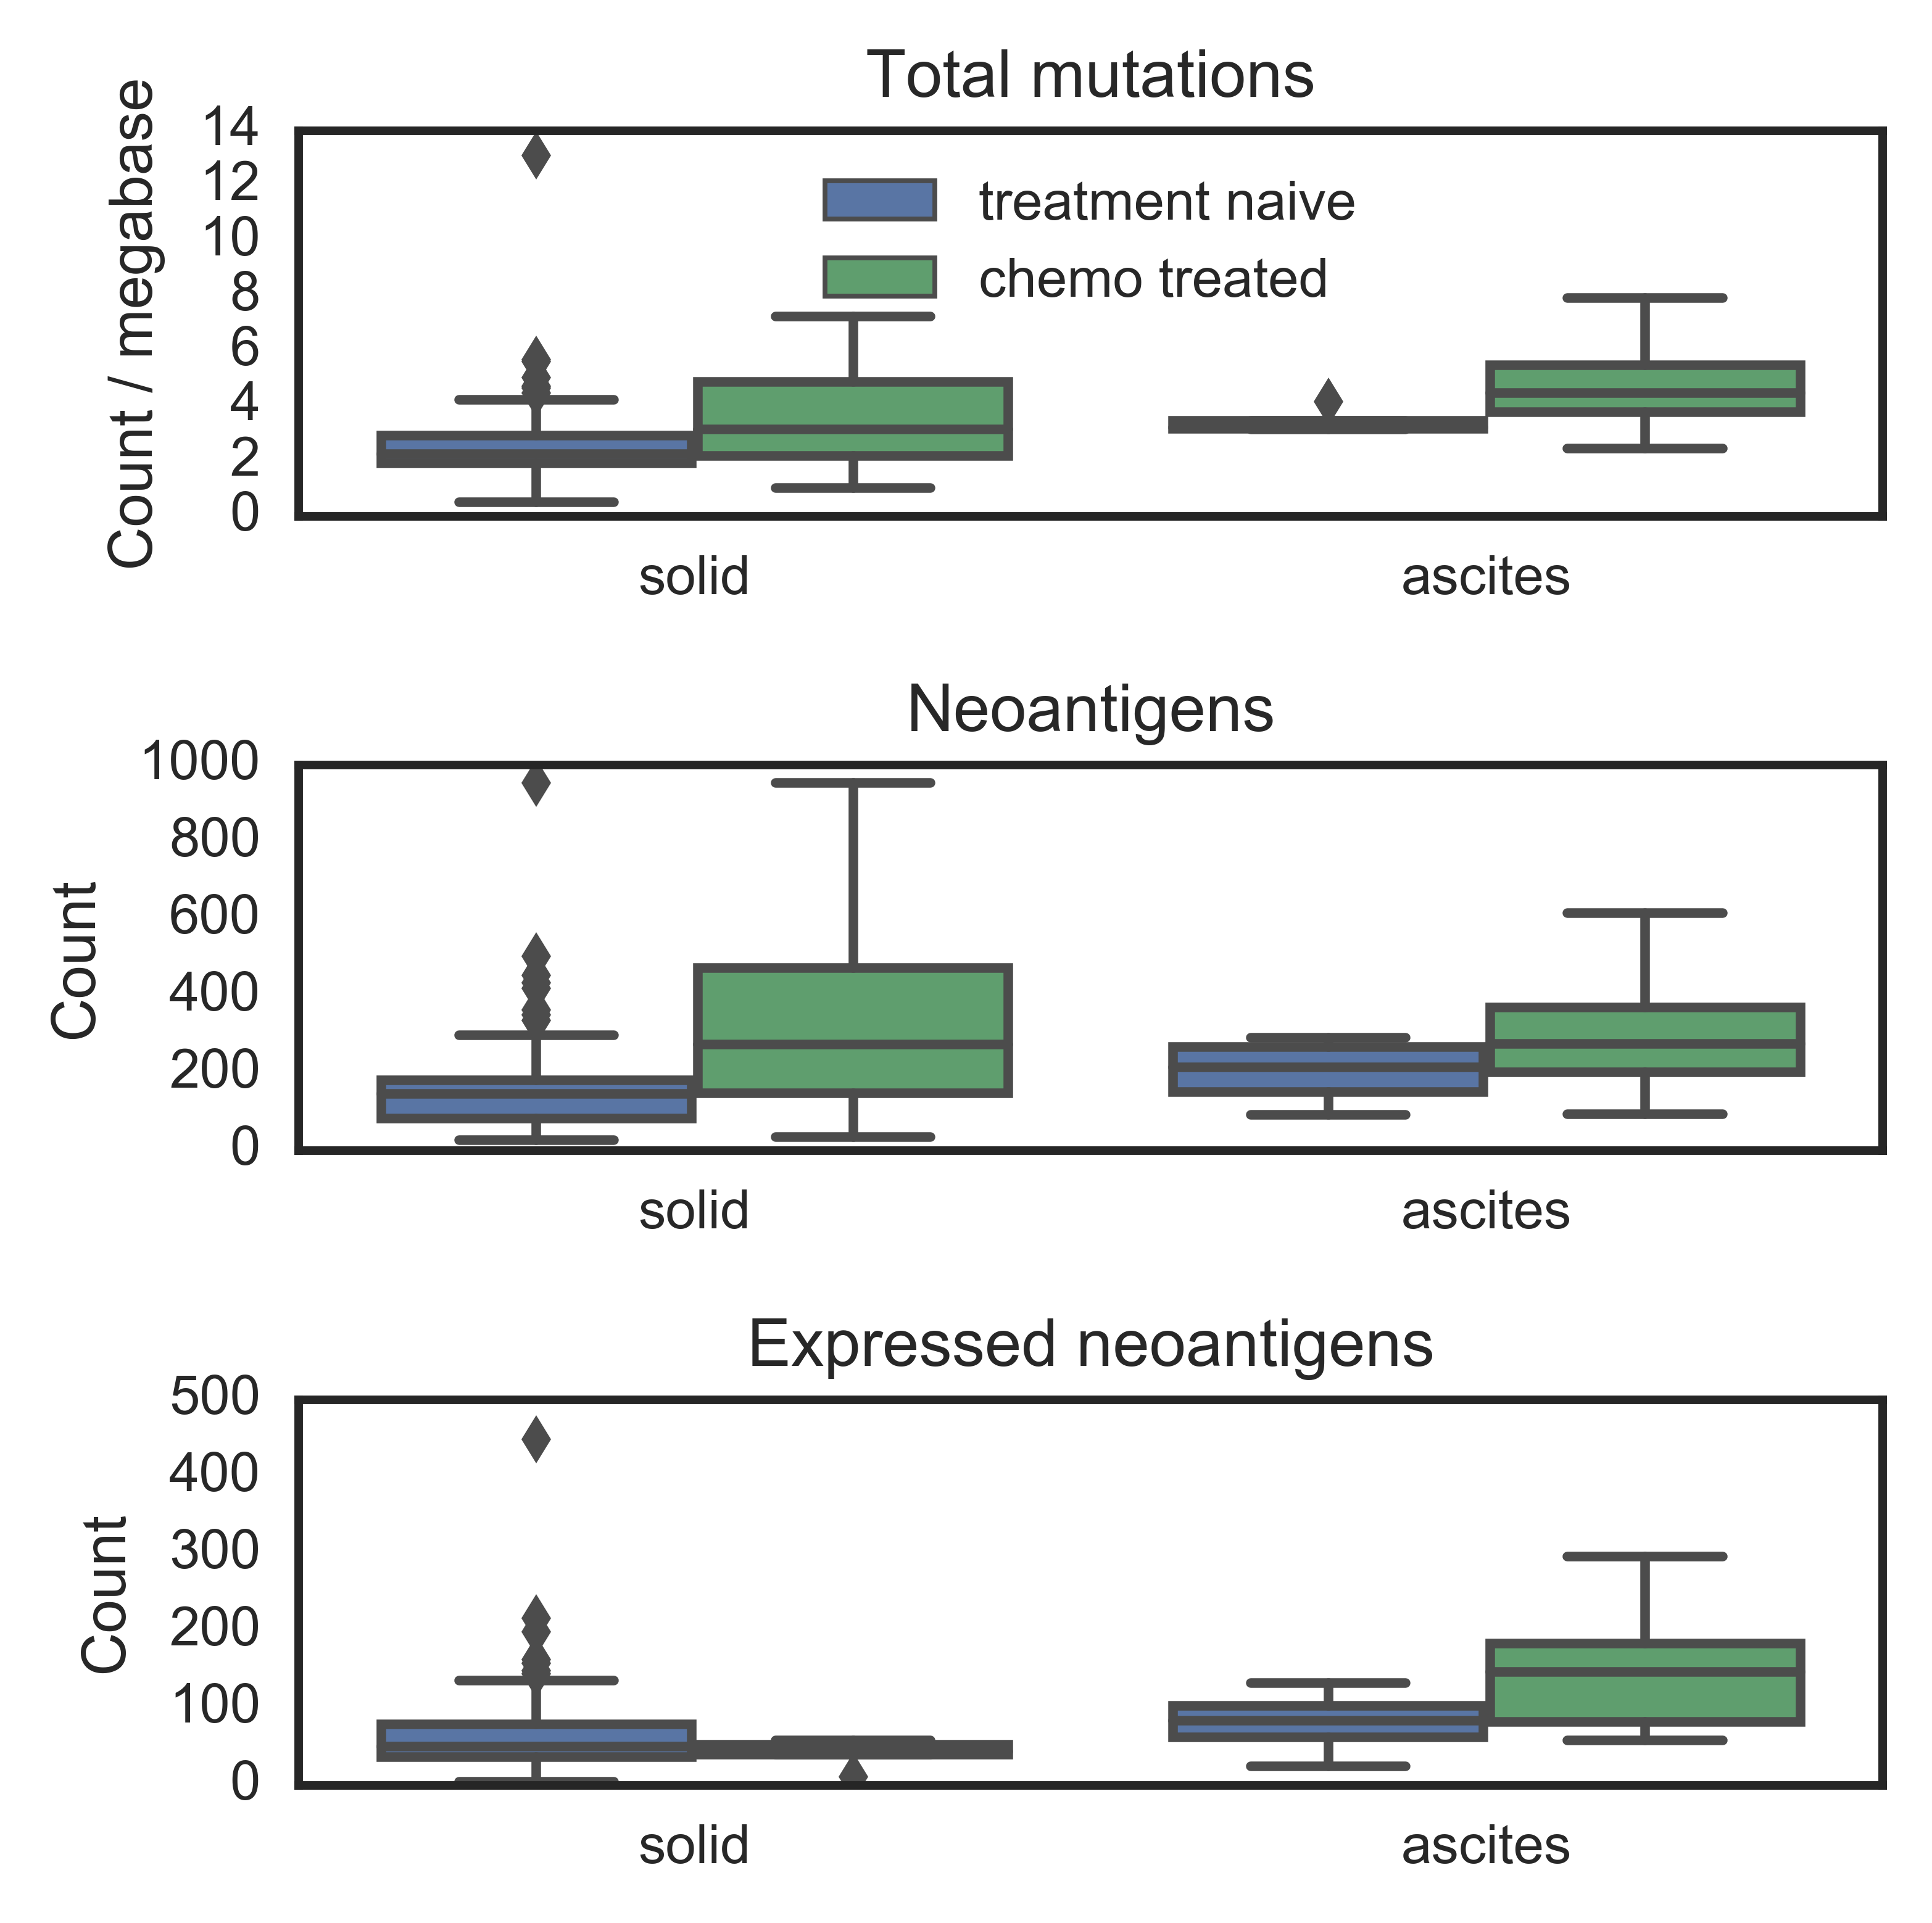

In [5]:
def format_figure():
    pyplot.xlabel("")
    pyplot.legend().remove()
    pyplot.ylim(ymin=0)

seaborn.set_context("paper")
seaborn.set_style("white")

pyplot.figure(figsize=(4,4))
grid=(3,1)
i = 0

ax = pyplot.subplot2grid(grid,(i, 0), colspan=2)
#pyplot.title("A", loc="left")
seaborn.boxplot(data=sources, x="tissue_type", y="mutations_per_mb", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.legend(loc="upper center")
pyplot.title("Total mutations")
pyplot.ylabel("Count / megabase")
i += 1

ax = pyplot.subplot2grid(grid,(i, 0), colspan=2)
#pyplot.title("A", loc="left")
seaborn.boxplot(data=sources, x="tissue_type", y="peptides", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
#pyplot.legend(loc="upper right")
pyplot.title("Neoantigens")
pyplot.ylabel("Count")
i += 1

ax = pyplot.subplot2grid(grid,(i, 0))
#pyplot.title("Expressed mutations")
#pyplot.title("B", loc="left")
#sub_data = sources[sources.cohort != "TCGA"]
sub_data = sources
seaborn.boxplot(data=sub_data, x="tissue_type", y="expressed peptides", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.title("Expressed neoantigens")
pyplot.ylabel("Count")
pyplot.ylim(ymin=0, ymax=500)
i += 1

'''
ax = pyplot.subplot2grid(grid,(i, 0))
pyplot.title("C", loc="left")
seaborn.boxplot(data=sources, x="group", y="interesting mutations", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.tight_layout()
pyplot.title("percent C>A")
pyplot.ylabel("")
i += 1
'''
pyplot.tight_layout()

pyplot.savefig("../figures/fig1.pdf")


In [6]:
(sources.ix[sources.cohort == "AOCS"].peptides / sources.ix[sources.cohort == "AOCS"].mutations).sort(inplace=False)

source_id
AOCS-083-1/SP101592     0.004088
AOCS-092-13/SP101630    0.005761
AOCS-092-1/SP101628     0.006454
AOCS-144-1/SP101951     0.006975
AOCS-107-1/SP101674     0.007480
AOCS-113-1/SP101694     0.007665
AOCS-169-1/SP102168     0.008021
AOCS-004-1/SP101519     0.008547
AOCS-160-1/SP102084     0.008944
AOCS-170-1/SP102174     0.009765
AOCS-170-12/SP102177    0.009884
AOCS-105-1/SP101666     0.009980
AOCS-157-1/SP102055     0.010586
AOCS-155-13/SP102045    0.010591
AOCS-005-1/SP101521     0.010696
AOCS-059-1/SP101536     0.010849
AOCS-159-1/SP102074     0.011102
AOCS-055-1/SP101526     0.011779
AOCS-084-1/SP101596     0.012524
AOCS-096-1/SP101654     0.013041
AOCS-162-1/SP102096     0.013163
AOCS-115-1/SP101708     0.013358
AOCS-123-1/SP101756     0.013804
AOCS-112-1/SP101690     0.013940
AOCS-149-1/SP102000     0.014207
AOCS-126-1/SP101785     0.014344
AOCS-090-1/SP101616     0.014365
AOCS-131-1/SP101815     0.014444
AOCS-081-1/SP101588     0.014919
AOCS-141-13/SP101916    0.014965


In [7]:
sources

donor cohort library treated   timepoint metastasis  \
source_id                                                                      
AOCS-001-1/SP101515   AOCS-001   AOCS     WGS   False     primary      False   
AOCS-002-1/SP101517   AOCS-002   AOCS     WGS   False     primary      False   
AOCS-004-1/SP101519   AOCS-004   AOCS     WGS   False     primary      False   
AOCS-005-1/SP101521   AOCS-005   AOCS     WGS   False     primary      False   
AOCS-034-13/SP101524  AOCS-034   AOCS     WGS    True  recurrence      False   
AOCS-034-1/SP101523   AOCS-034   AOCS     WGS   False     primary      False   
AOCS-055-1/SP101526   AOCS-055   AOCS     WGS   False     primary      False   
AOCS-056-1/SP101528   AOCS-056   AOCS     WGS   False     primary      False   
AOCS-057-1/SP101530   AOCS-057   AOCS     WGS   False     primary      False   
AOCS-058-1/SP101532   AOCS-058   AOCS     WGS   False     primary      False   
AOCS-059-1/SP101536   AOCS-059   AOCS     WGS   False     primary      False   
AOCS-060-1/SP101540   AOCS-060   AOCS     WGS   False     primary      False   
AOCS-061-1/SP101544   AOCS-061   AOCS     WGS   False     primary      False   
AOCS-063-1/SP101548   AOCS-063   AOCS     WGS   False     primary      False   
AOCS-064-13/SP101554  AOCS-064   AOCS     WGS    True  recurrence      False   
AOCS-064-1/SP101552   AOCS-064   AOCS     WGS   False     primary      False   
AOCS-065-13/SP101560  AOCS-065   AOCS     WGS    True  recurrence      False   
AOCS-065-1/SP101558   AOCS-065   AOCS     WGS   False     primary      False   
AOCS-075-1/SP101564   AOCS-075   AOCS     WGS   False     primary      False   
AOCS-076-1/SP101568   AOCS-076   AOCS     WGS   False     primary      False   
AOCS-077-1/SP101572   AOCS-077   AOCS     WGS    True     primary      False   
AOCS-078-1/SP101576   AOCS-078   AOCS     WGS   False     primary      False   
AOCS-079-1/SP101580   AOCS-079   AOCS     WGS   False     primary      False   
AOCS-080-1/SP101584   AOCS-080   AOCS     WGS   False     primary      False   
AOCS-081-1/SP101588   AOCS-081   AOCS     WGS   False     primary      False   
AOCS-083-1/SP101592   AOCS-083   AOCS     WGS   False     primary      False   
AOCS-084-1/SP101596   AOCS-084   AOCS     WGS   False     primary      False   
AOCS-085-1/SP101600   AOCS-085   AOCS     WGS   False     primary      False   
AOCS-086-1/SP101604   AOCS-086   AOCS     WGS   False     primary      False   
AOCS-086-13/SP101606  AOCS-086   AOCS     WGS    True  recurrence      False   
...                        ...    ...     ...     ...         ...        ...   
AOCS-144-1/SP101951   AOCS-144   AOCS     WGS   False     primary      False   
AOCS-145-1/SP101961   AOCS-145   AOCS     WGS   False     primary      False   
AOCS-146-1/SP101971   AOCS-146   AOCS     WGS   False     primary      False   
AOCS-147-1/SP101981   AOCS-147   AOCS     WGS   False     primary      False   
AOCS-148-1/SP101990   AOCS-148   AOCS     WGS   False     primary      False   
AOCS-149-1/SP102000   AOCS-149   AOCS     WGS   False     primary      False   
AOCS-150-13/SP102010  AOCS-150   AOCS     WGS    True  recurrence      False   
AOCS-150-14/SP102015  AOCS-150   AOCS     WGS    True  recurrence      False   
AOCS-152-1/SP102025   AOCS-152   AOCS     WGS   False     primary      False   
AOCS-153-1/SP102035   AOCS-153   AOCS     WGS   False     primary      False   
AOCS-155-13/SP102045  AOCS-155   AOCS     WGS    True  recurrence      False   
AOCS-157-1/SP102055   AOCS-157   AOCS     WGS   False     primary      False   
AOCS-158-1/SP102064   AOCS-158   AOCS     WGS    True     primary      False   
AOCS-159-1/SP102074   AOCS-159   AOCS     WGS   False     primary      False   
AOCS-160-1/SP102084   AOCS-160   AOCS     WGS   False     primary      False   
AOCS-161-1/SP102090   AOCS-161   AOCS     WGS   False     primary      False   
AOCS-162-1/SP102096   AOCS-162   AOCS     WGS    True     primary      False   
AOCS-163-1/SP102103   AOC

In [8]:
sources.ix[sources.donor == "AOCS-077"]

donor cohort library treated timepoint metastasis  \
source_id                                                                   
AOCS-077-1/SP101572  AOCS-077   AOCS     WGS    True   primary      False   

                    tissue_type  interval_days assay paired  \
source_id                                                     
AOCS-077-1/SP101572       solid             75   WGS  False   

                               source_id timepoint_paired  protein changing  \
source_id                                                                     
AOCS-077-1/SP101572  AOCS-077-1/SP101572            False                37   

                     peptides  expressed peptides  mutations  \
source_id                                                      
AOCS-077-1/SP101572       955                  58       3084   

                     mutations_per_mb  indel  interesting mutations  \
source_id                                                             
AOCS-077-1/SP101572          1.027315      2               16.50454   

                          group      treatment  fraction_peptides_expressed  
source_id                                                                    
AOCS-077-1/SP101572  AOCS solid  chemo treated                     0.060733

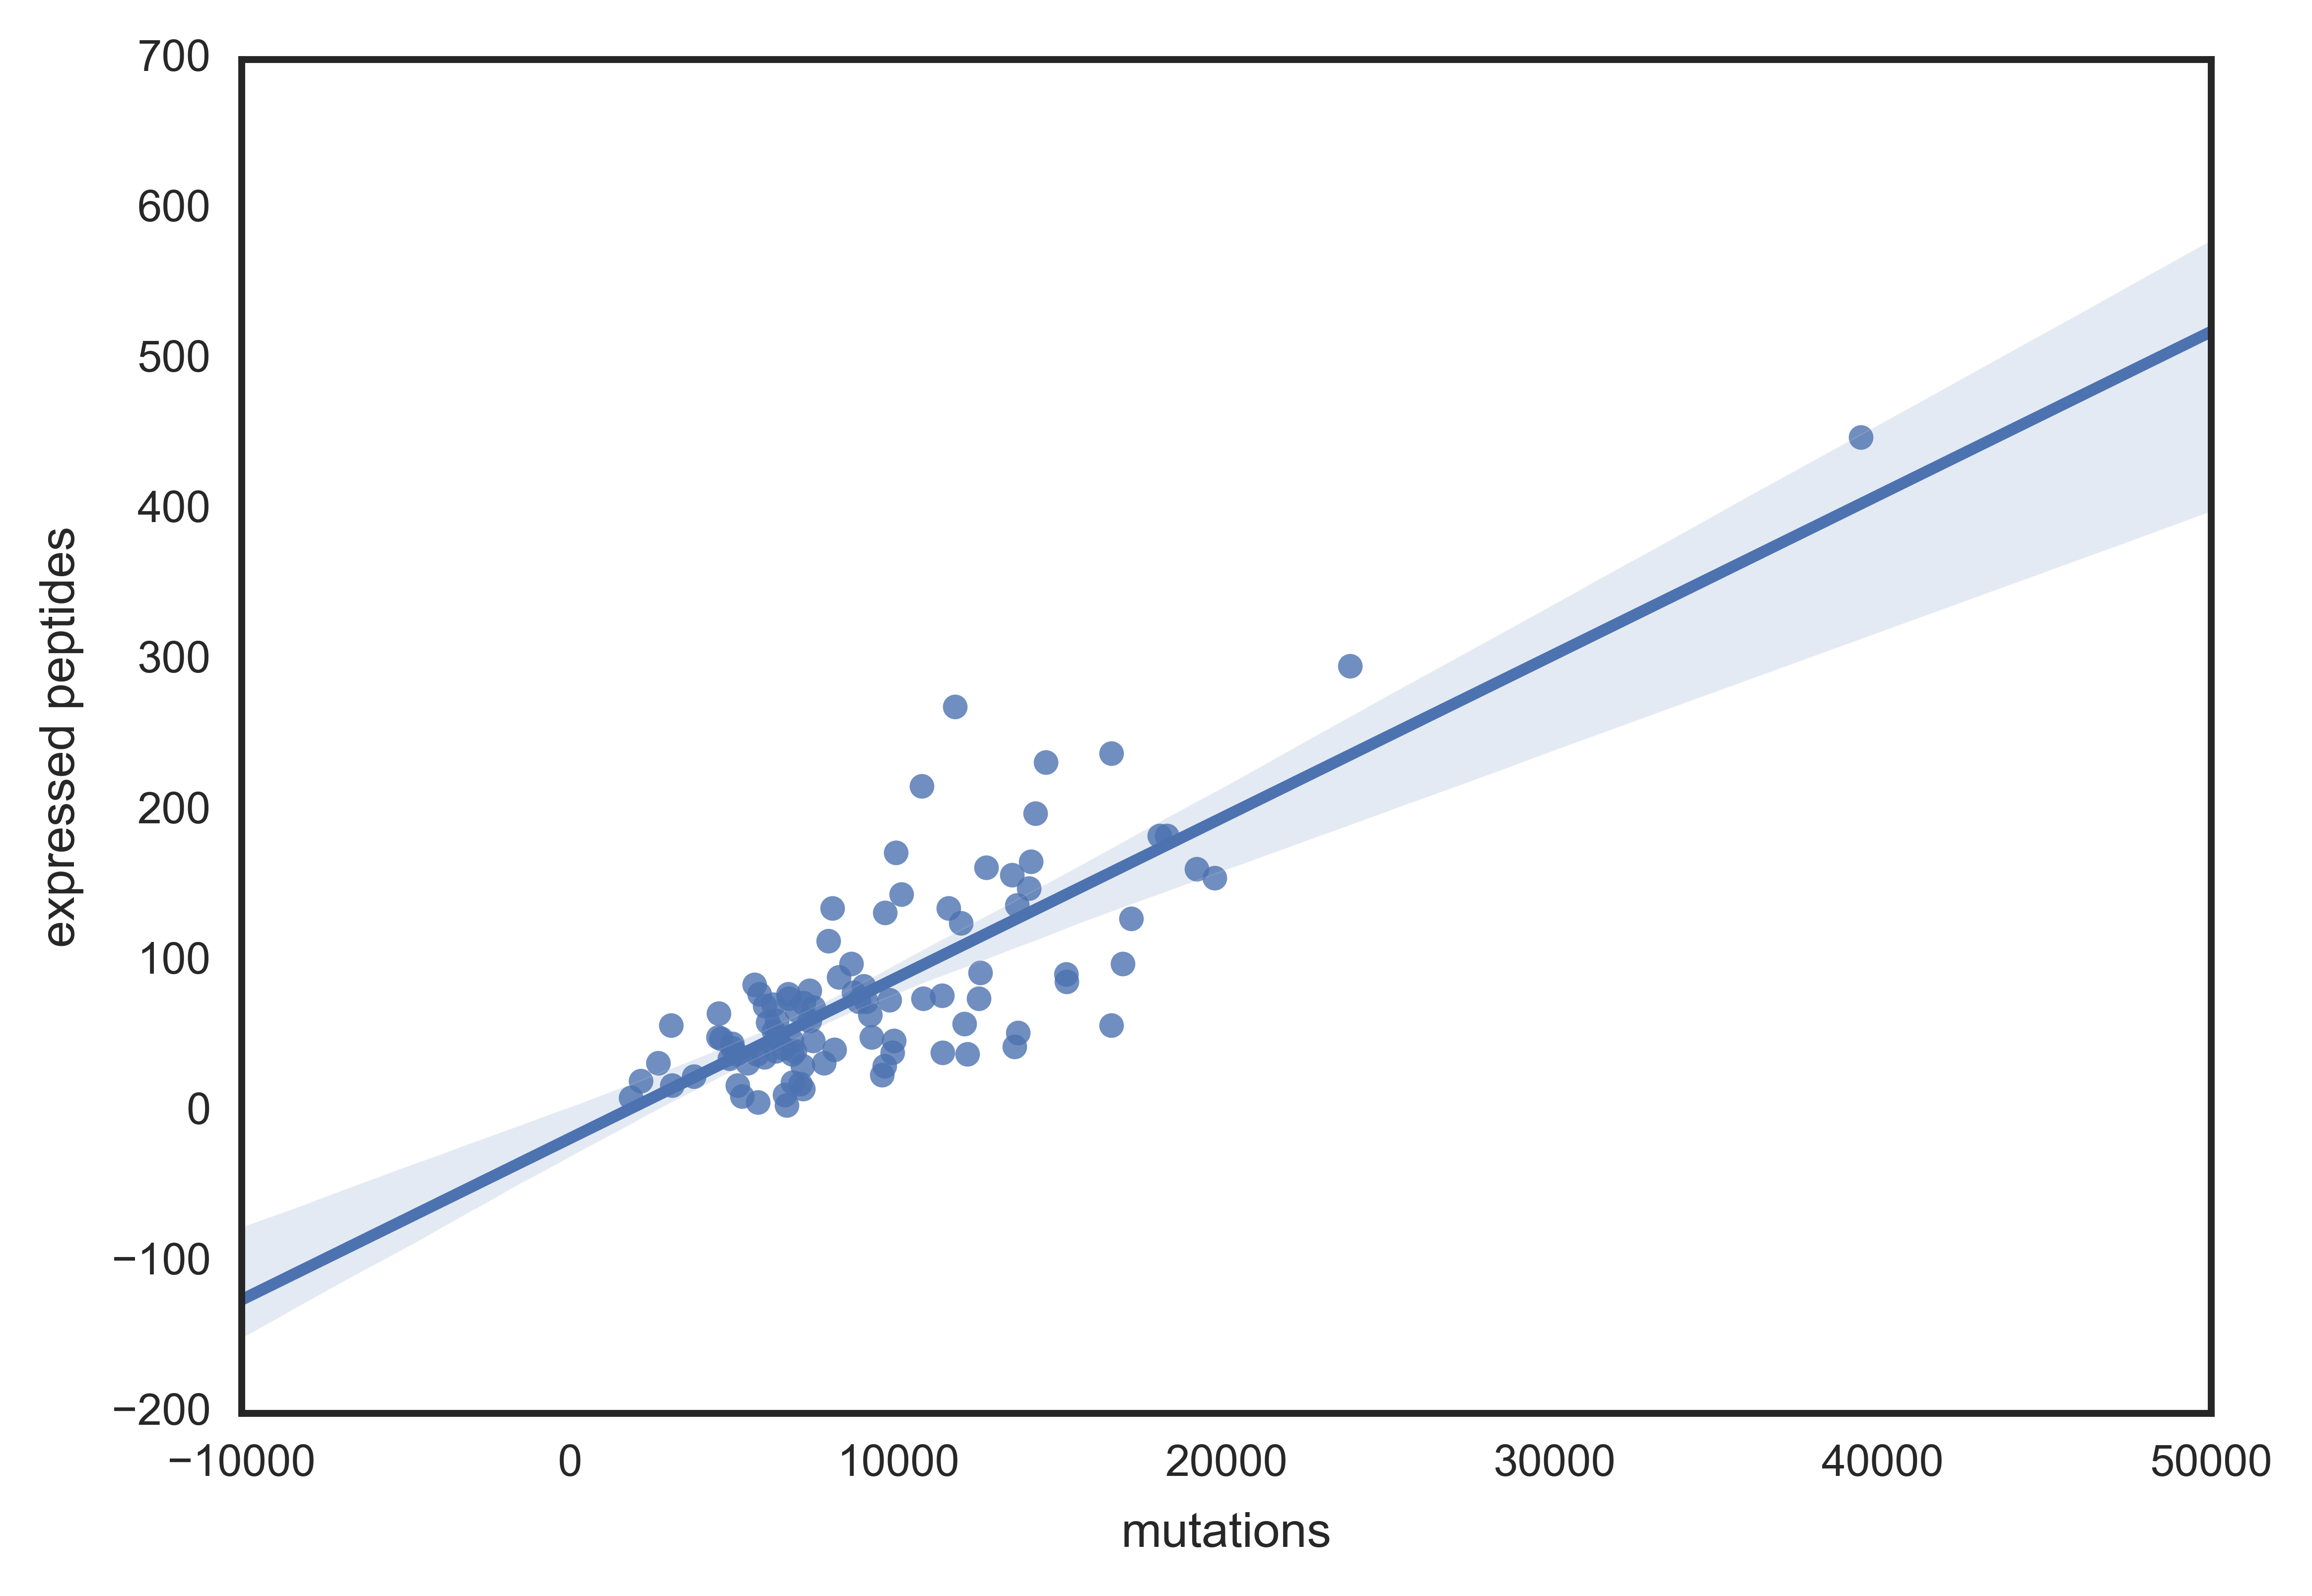

In [9]:
seaborn.regplot(sources.ix[sources.cohort == "AOCS"].mutations, sources.ix[sources.cohort == "AOCS"]["expressed peptides"])

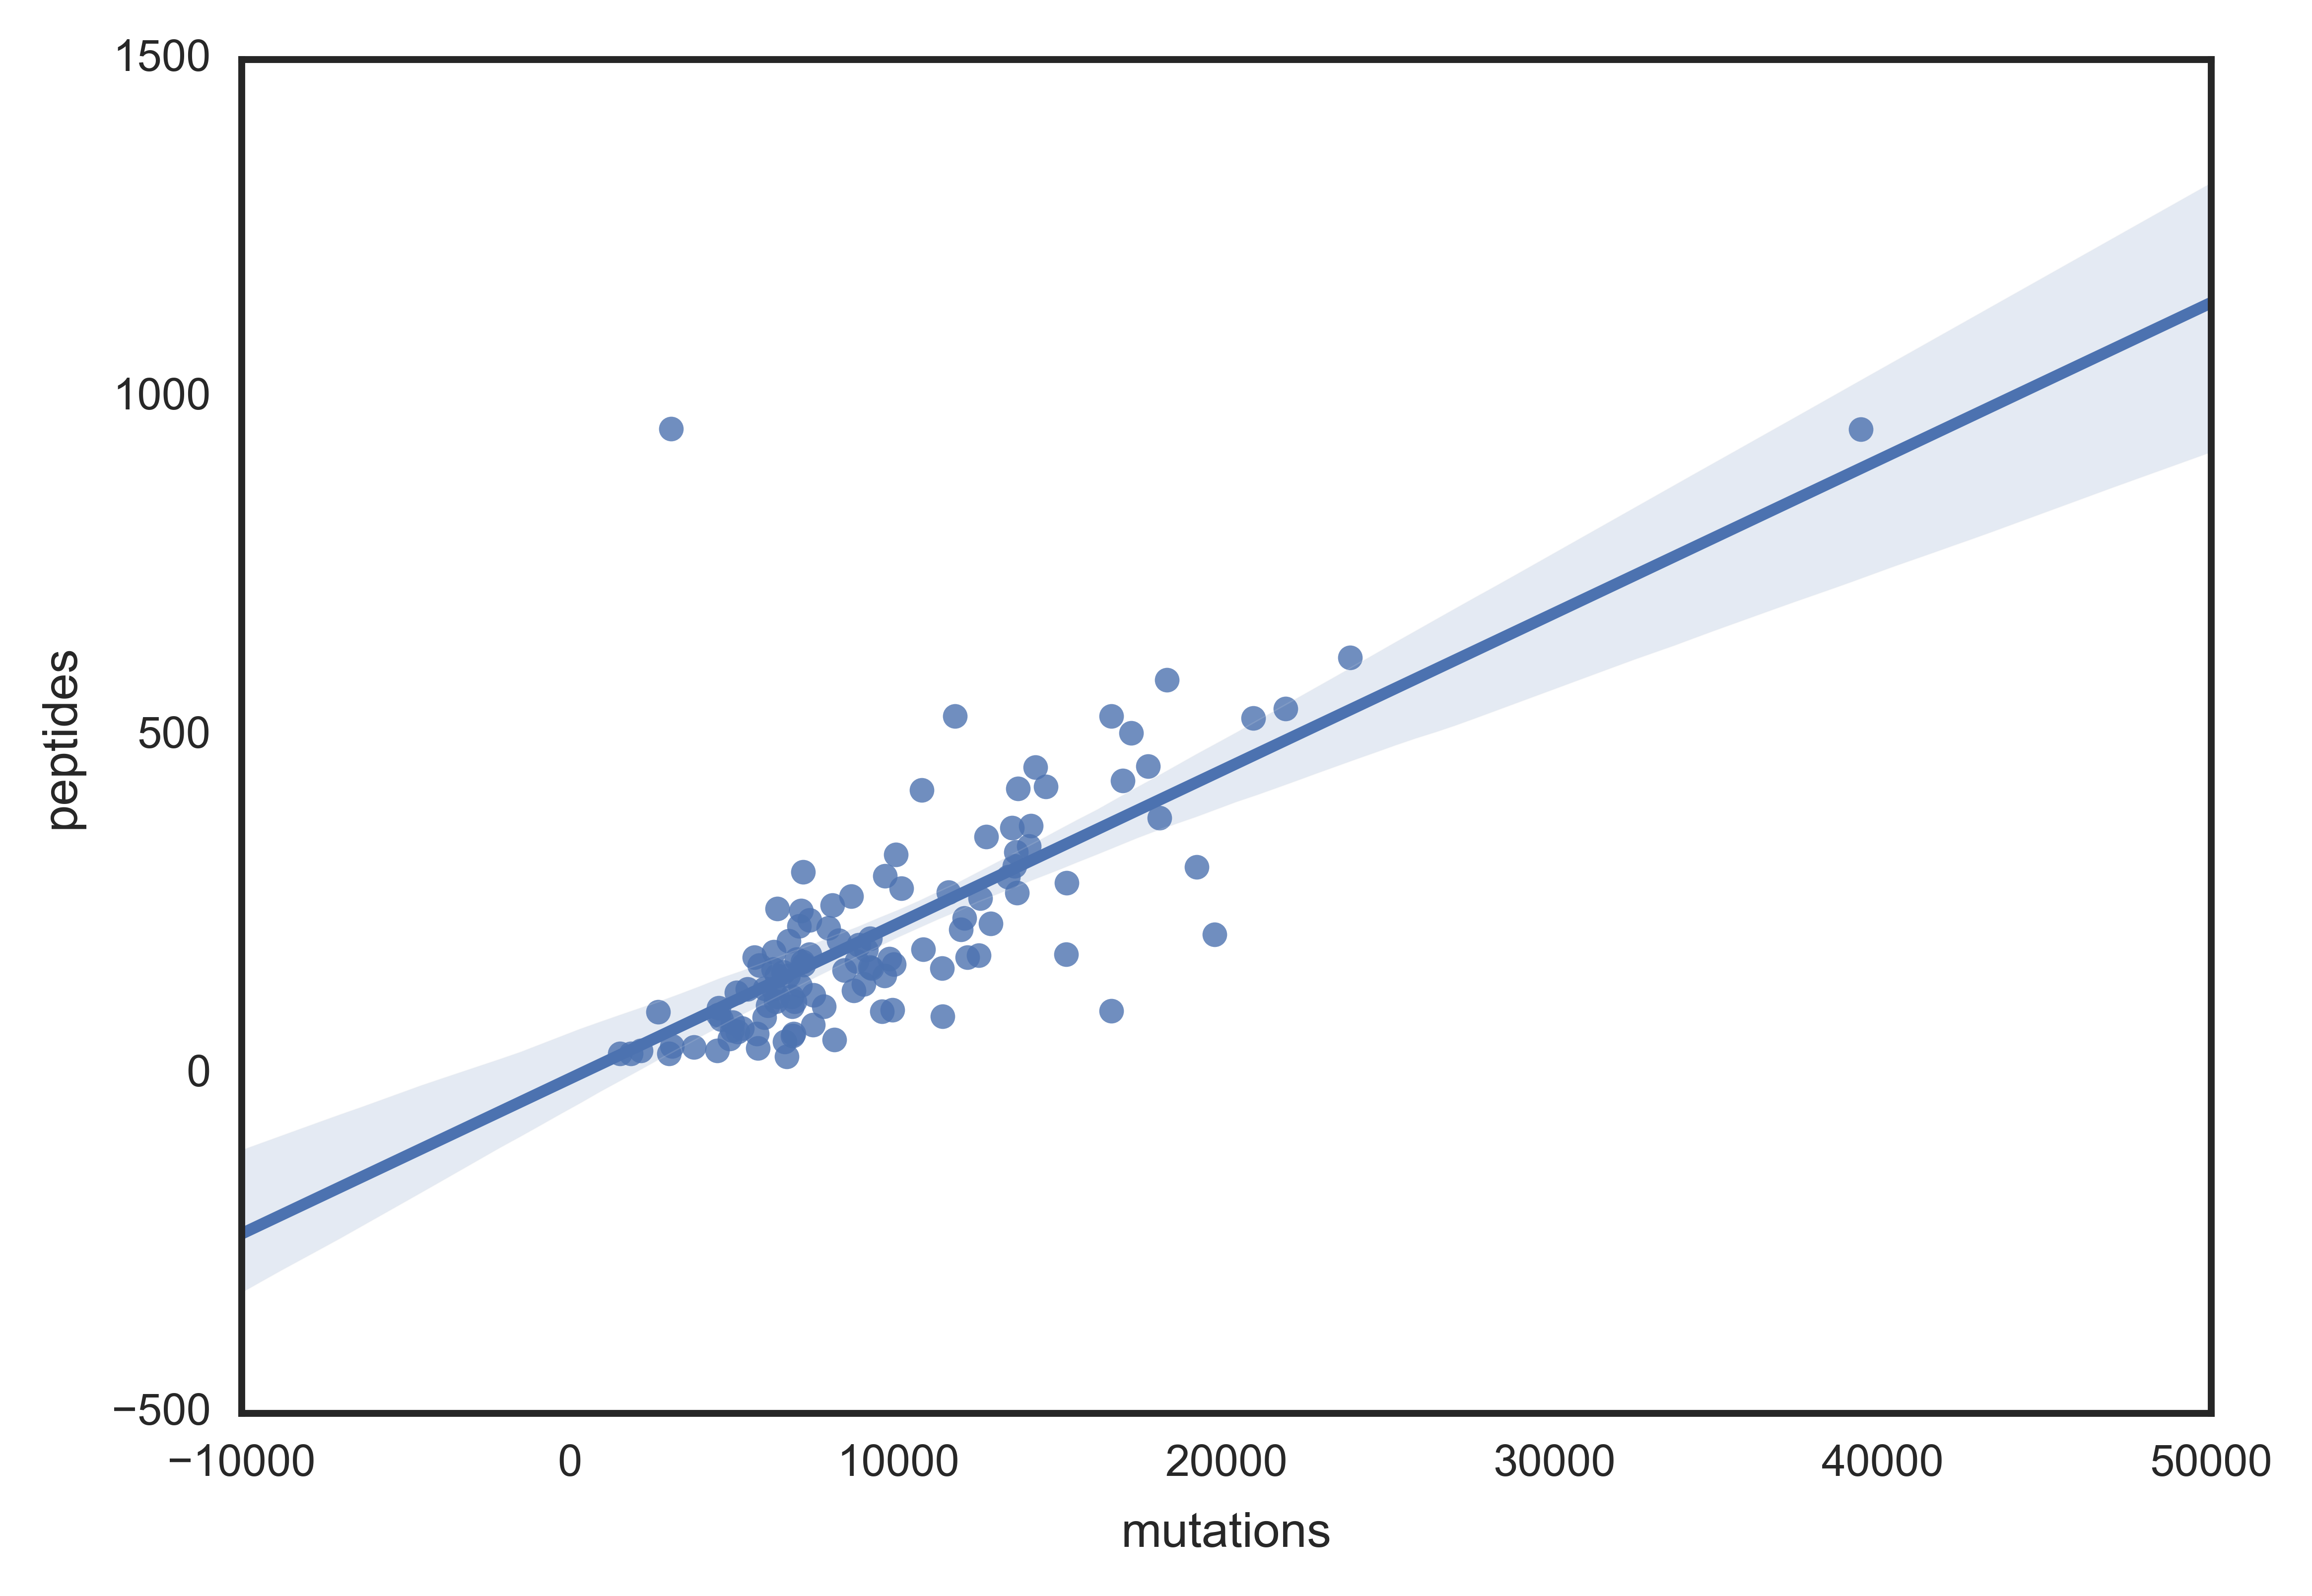

In [10]:
seaborn.regplot(sources.ix[sources.cohort == "AOCS"].mutations, sources.ix[sources.cohort == "AOCS"].peptides)

In [11]:
aocs_sources = sources.ix[sources.cohort == "AOCS"]

In [12]:
muts_confident.ix[1076674]

source_id                                              AOCS-077-1/SP101572
donor                                                             AOCS-077
called                                                                   1
genome                                                              GRCh37
contig                                                                   2
interbase_start                                                  170139453
interbase_end                                                    170139454
ref                                                                      -
alt                                                                      C
effect                                                            p.H369fs
gene                                                                  LRP2
context_5_prime                                            TGGCACAGGTGACGG
context_3_prime                                            CAGGTCGGCTTTCAC
context_mutation         

In [13]:
aocs_muts = mutations.ix[mutations.donor.str.startswith("AOCS")]
aocs_muts_confident = muts_confident.ix[muts_confident.donor.str.startswith("AOCS")]
aocs_muts_confident_coding = aocs_muts_confident.ix[aocs_muts_confident.effect.str.startswith("p.")]
aocs_muts_confident_coding_expressed = aocs_muts_confident_coding.ix[aocs_muts_confident_coding.rna_alt_reads > 2]

non_exon_effects = [
    "intergenic",
    "intragenic",
    "intronic",
    "non-coding-transcript",
    "incomplete",
    "splice-acceptor",
    "splice-donor",
    "intronic-splice-site",
    "exonic-splice-site",
    "3' UTR",
    "5' UTR",
]

aocs_muts_confident_exon = aocs_muts_confident.ix[~ aocs_muts_confident.effect.isin(non_exon_effects)]
aocs_muts_exon = aocs_muts.ix[~ aocs_muts.effect.isin(non_exon_effects)]

[x for x in aocs_muts_confident_exon.effect.unique().tolist() if not x.startswith("p.")]

['silent']

In [14]:
treated_sources = set(sources.index[sources.treated])
len(treated_sources)

37

In [15]:
paired_treated_sources = set(sources.index[sources.treated & sources.paired])

In [16]:
sources_with_unique_to_treated = set(mutations.ix[mutations.unique_to_treated].source_id.unique())

In [17]:
mutations_with_signatures = pandas.read_csv("../data/mutations_with_signatures.csv")
del mutations_with_signatures["Unnamed: 0"]
mutations_with_signatures["indel"] = (
    (mutations_with_signatures.ref.str.len() == mutations_with_signatures.alt.str.len()) &
    (mutations_with_signatures.ref.str.len() > 1))
mutations_with_signatures["mnv"] = ((~mutations_with_signatures.snv) & (~mutations_with_signatures.indel))
mutations_with_signatures
mutations_with_signatures_exon = mutations_with_signatures.ix[~ mutations_with_signatures.effect.isin(non_exon_effects)]
mutations_with_signatures_exon.shape

/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


(2381, 66)

In [18]:
mutations_with_signatures.indel.sum()

0

In [19]:
display_signatures = ["Signature 1", "Signature 3", "Signature 4"]

sources_with_signature_counts = sources.copy()
for source_id, grouped in mutations_with_signatures.groupby("source_id"):
    if sources.ix[source_id].treated:
        sub_all_muts = mutations.ix[(mutations.source_id == source_id) & mutations.unique_to_treated]
        sub_exon_muts = aocs_muts_exon.ix[(mutations.source_id == source_id) & mutations.unique_to_treated]
    else:
        sub_all_muts = mutations.ix[(mutations.source_id == source_id)]
        sub_exon_muts = aocs_muts_exon.ix[(mutations.source_id == source_id)]
        
    num_mutations = float(sub_all_muts.shape[0])
    num_exon_mutations = float(sub_exon_muts.shape[0])
    num_neoantigens = float(sub_all_muts.num_binders.sum())
    
    snv_mutations_accounted_for = 0.0
    snv_neoantigens_accounted_for = 0.0
    for sig in display_signatures:
        snv_mutations_accounted_for += grouped[sig].sum()
        snv_neoantigens_accounted_for += numpy.dot(grouped[sig], grouped.num_binders)
        
        sources_with_signature_counts.loc[source_id, "%s mutations" % sig] = grouped[sig].sum() / num_mutations
        sources_with_signature_counts.loc[source_id, "%s neoantigens" % sig] = (
            numpy.dot(grouped[sig], grouped.num_binders)) / num_neoantigens
    
    snv_mutations = sub_all_muts.snv.sum()
    snv_neoantigens = sub_all_muts.ix[sub_all_muts.snv].num_binders.sum()
    
    sources_with_signature_counts.loc[source_id, "other snv mutations"] = (
        snv_mutations - snv_mutations_accounted_for) / num_mutations
    sources_with_signature_counts.loc[source_id, "other snv neoantigens"] = (
        snv_neoantigens - snv_neoantigens_accounted_for) / num_neoantigens

    sources_with_signature_counts.loc[source_id, "snv mutations"] = snv_mutations
    sources_with_signature_counts.loc[source_id, "snv neoantigens"] = snv_neoantigens
    
    sources_with_signature_counts.loc[source_id, "mnv mutations"] = (
        (~ sub_all_muts.indel) & (~ sub_all_muts.snv)).sum() / num_mutations
    sources_with_signature_counts.loc[source_id, "mnv neoantigens"] = (
        sub_all_muts.ix[(~ sub_all_muts.indel) & (~ sub_all_muts.snv)].num_binders.sum()) / num_neoantigens
    
    sources_with_signature_counts.loc[source_id, "indel mutations"] = (
        (sub_all_muts.indel).sum()) / num_exon_mutations
    sources_with_signature_counts.loc[source_id, "indel neoantigens"] = (
        sub_all_muts.ix[sub_all_muts.indel].num_binders.sum()) / num_neoantigens
    
sources_with_signature_counts[sources_with_signature_counts.paired]
    

donor cohort library treated   timepoint metastasis  \
source_id                                                                      
AOCS-034-13/SP101524  AOCS-034   AOCS     WGS    True  recurrence      False   
AOCS-034-1/SP101523   AOCS-034   AOCS     WGS   False     primary      False   
AOCS-064-13/SP101554  AOCS-064   AOCS     WGS    True  recurrence      False   
AOCS-064-1/SP101552   AOCS-064   AOCS     WGS   False     primary      False   
AOCS-065-13/SP101560  AOCS-065   AOCS     WGS    True  recurrence      False   
AOCS-065-1/SP101558   AOCS-065   AOCS     WGS   False     primary      False   
AOCS-086-1/SP101604   AOCS-086   AOCS     WGS   False     primary      False   
AOCS-086-13/SP101606  AOCS-086   AOCS     WGS    True  recurrence      False   
AOCS-088-1/SP101610   AOCS-088   AOCS     WGS   False     primary      False   
AOCS-088-13/SP101612  AOCS-088   AOCS     WGS    True  recurrence      False   
AOCS-091-1/SP101622   AOCS-091   AOCS     WGS   False     primary      False   
AOCS-091-13/SP101624  AOCS-091   AOCS     WGS    True  recurrence      False   
AOCS-092-1/SP101628   AOCS-092   AOCS     WGS   False     primary      False   
AOCS-092-13/SP101630  AOCS-092   AOCS     WGS    True  recurrence      False   
AOCS-093-1/SP101634   AOCS-093   AOCS     WGS   False     primary      False   
AOCS-093-12/SP101636  AOCS-093   AOCS     WGS   False     primary      False   
AOCS-093-13/SP101638  AOCS-093   AOCS     WGS    True  recurrence      False   
AOCS-094-1/SP101642   AOCS-094   AOCS     WGS   False     primary      False   
AOCS-094-2/SP106641   AOCS-094   AOCS     WGS    True  recurrence      False   
AOCS-095-13/SP101650  AOCS-095   AOCS     WGS    True  recurrence      False   
AOCS-095-1/SP101648   AOCS-095   AOCS     WGS   False     primary      False   
AOCS-137-13/SP101871  AOCS-137   AOCS     WGS    True  recurrence      False   
AOCS-137-12/SP101866  AOCS-137   AOCS     WGS   False     primary      False   
AOCS-139-4/SP101906   AOCS-139   AOCS     WGS    True  recurrence      False   
AOCS-139-1/SP101891   AOCS-139   AOCS     WGS   False     primary      False   
AOCS-139-17/SP101901  AOCS-139   AOCS     WGS    True  recurrence       True   
AOCS-139-16/SP101896  AOCS-139   AOCS     WGS    True  recurrence       True   
AOCS-170-12/SP102177  AOCS-170   AOCS     WGS   False     primary      False   
AOCS-170-1/SP102174   AOCS-170   AOCS     WGS    True     primary      False   

                     tissue_type  interval_days assay paired  \
source_id                                                      
AOCS-034-13/SP101524     ascites           1597   WGS   True   
AOCS-034-1/SP101523        solid              0   WGS   True   
AOCS-064-13/SP101554     ascites           1301   WGS   True   
AOCS-064-1/SP101552        solid              0   WGS   True   
AOCS-065-13/SP101560     ascites            420   WGS   True   
AOCS-065-1/SP101558        solid              0   WGS   True   
AOCS-086-1/SP101604        solid              0   WGS   True   
AOCS-086-13/SP101606     ascites           2009   WGS   True   
AOCS-088-1/SP101610        solid              0   WGS   True   
AOCS-088-13/SP101612     ascites           2712   WGS   True   
AOCS-091-1/SP101622        solid              0   WGS   True   
AOCS-091-13/SP101624     ascites           1206   WGS   True   
AOCS-092-1/SP101628        solid              0   WGS   True   
AOCS-092-13/SP101630     ascites           1370   WGS   True   
AOCS-093-1/SP101634        solid              0   WGS   True   
AOCS-093-12/SP101636     ascites              0   WGS   True   
AOCS-093-13/SP101638     ascites           1361   WGS   True   
AOCS-094-1/SP101642        solid              0   WGS   True   
AOCS-094-2/SP106641        solid            758   WGS   True   
AOCS-095-13/SP101650     ascites           1161   WGS   True   
AOCS-095-1/SP101648        solid              0   WGS   True   
AOCS-137-13/SP101871     ascites            923   WGS   True   
AOCS-137

('mutations', 'primary', 105.70028865036987, array([ 41.18398134,  52.11158414,   1.72967883,   3.92247353,
         0.98904387,   5.76352694]))
('mutations', 'new', 106.57138644992513, array([ 26.66975009,  54.43741039,   9.65280985,   7.49860016,
         1.6848508 ,   6.62796516]))
('neoantigens', 'primary', 99.999999999999986, array([ 35.5127775 ,  40.22476816,   1.10193064,   2.42883172,
         6.08386633,  14.64782565]))
('neoantigens', 'new', 100.00000000000001, array([ 22.47633474,  42.74028549,   8.53379526,   7.49280182,
         4.23147207,  14.52531063]))


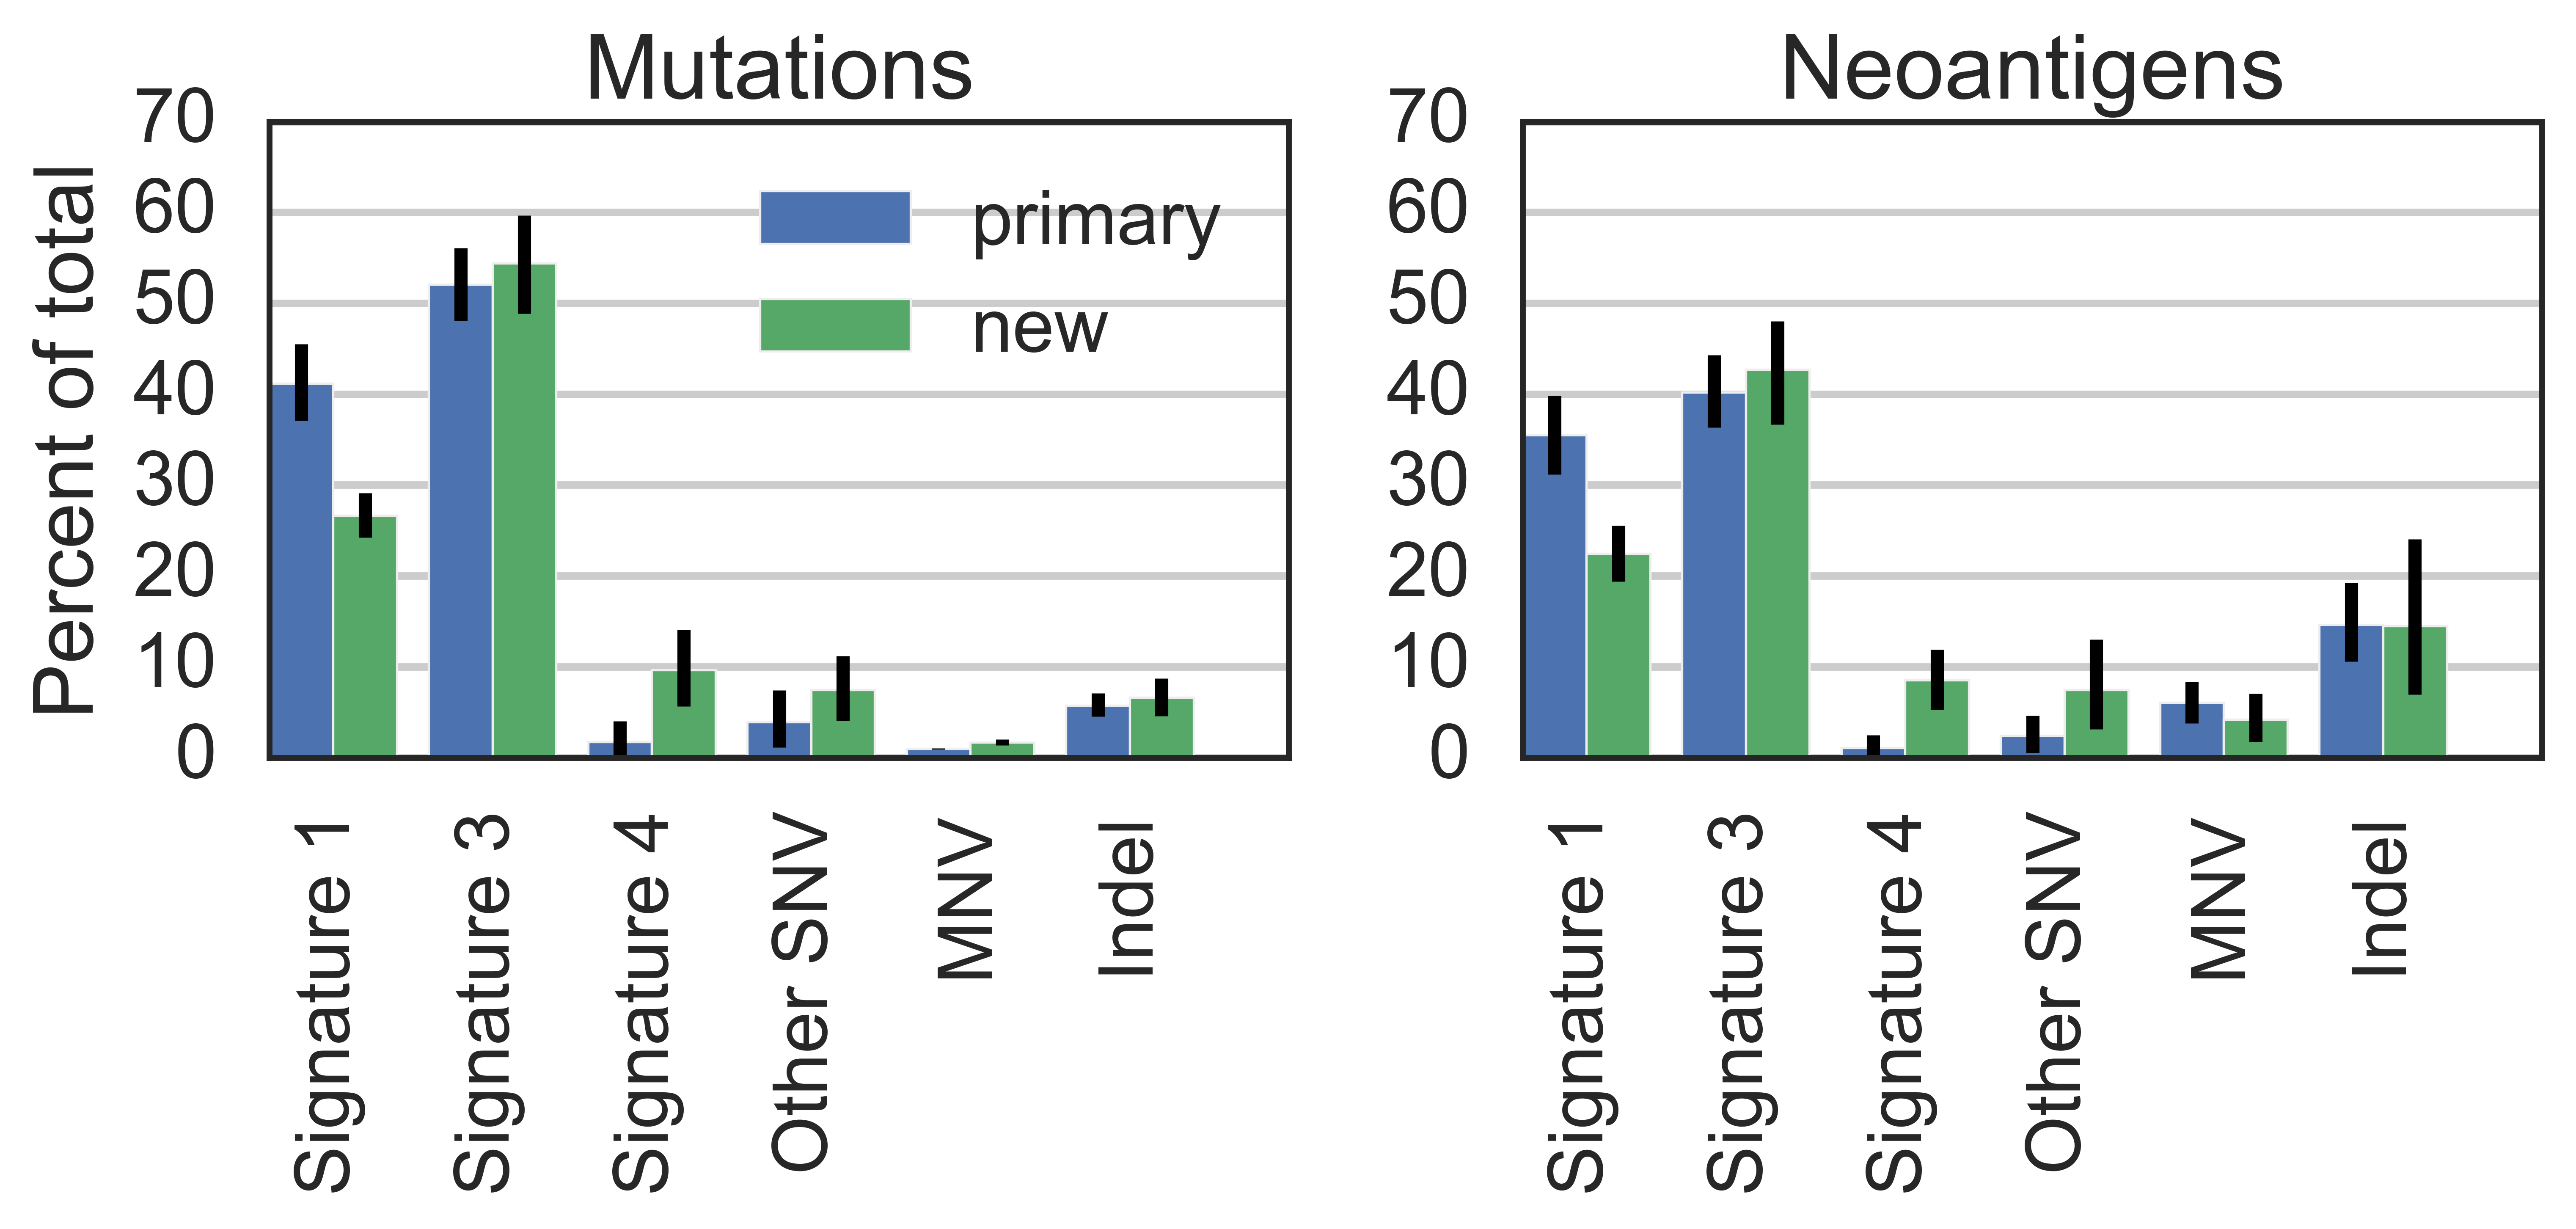

In [21]:
def cleanup_name(col):
    return (
        col.replace("snv", "SNV")
        .replace("mnv", "MNV")
        .replace("mutations", "")
        .replace("neoantigens", "")
        .replace("other", "Other")
        .replace("indel", "Indel")
        .strip())

seaborn.set_context("poster")
seaborn.set_style('white')
pyplot.figure(figsize=(8,4))
def plot_mutations_or_neoantigens(which):
    palette = itertools.cycle(seaborn.color_palette())
    cols = [x + " " + which for x in display_signatures + ["other snv", "mnv", "indel"]]
    masks = [
        ("primary", (~ sources_with_signature_counts.treated)),
        ("new", (sources_with_signature_counts.treated)),
    ]
    offset = 0
    for (label, mask) in masks:
        label_sources = sources_with_signature_counts.ix[mask]
        xs = numpy.arange(len(cols)) * 2.5 + offset
        ys = numpy.array([label_sources[col].mean() for col in cols]) * 100.0
        print(which, label, ys.sum(), ys)
        ranges = numpy.array([bootstrap(label_sources[col]) for col in cols]).T * 100.0
        error_low = ys - ranges[0]
        error_hi = ranges[1] - ys
        pyplot.bar(
            xs,
            ys,
            yerr=numpy.array([error_low, error_hi]),
            ecolor="black",
            label=label,
            color=next(palette),
            width=1.0)
        offset += 1
        
    pyplot.xticks(xs - 0.05, [cleanup_name(c) for c in cols], rotation=90)

pyplot.subplot(121)
plot_mutations_or_neoantigens("mutations")
pyplot.title("Mutations")
pyplot.ylabel("Percent of total")
pyplot.legend(loc='upper right')
pyplot.ylim(ymin=0, ymax=70)
pyplot.gca().yaxis.grid(True)
pyplot.subplot(122, sharey=pyplot.gca())
plot_mutations_or_neoantigens("neoantigens")
pyplot.title("Neoantigens")
pyplot.ylim(ymin=0, ymax=70)
#pyplot.yticks(numpy.arange(0, 100, 20), [""] * 6)
pyplot.gca().yaxis.grid(True)
pyplot.tight_layout()

In [22]:
display_signatures = ["Signature 1", "Signature 3", "Signature 4"]
def calculate(sub_df):
    categories = [
#        ("Indel", sub_df.indel.astype(int)),
#        ("MNV", ((~sub_df.indel) & (~sub_df.snv)).astype(int)),
    ]
    for sig in display_signatures:
        categories.append((sig, sub_df[sig]))
    categories.append(
        ("Other SNV", sub_df[[c for c in sub_df.columns if "Signature" in c and c not in display_signatures]].sum(1)))
    columns = collections.defaultdict(list)
    for (name, category) in categories:
        print(name)
        columns["%s mutations" % name].append(category.sum())
        columns["%s neoantigens" % name].append(numpy.dot(category, sub_df.num_binders))
    return pandas.DataFrame(columns)
    
calculate(mutations_with_signatures_exon[mutations_with_signatures_exon.unique_to_treated])

Signature 1
Signature 3
Signature 4
Other SNV


Other SNV mutations  Other SNV neoantigens  Signature 1 mutations  \
0            81.207034              137.58452             277.907366   

   Signature 1 neoantigens  Signature 3 mutations  Signature 3 neoantigens  \
0               518.178492             456.167154               943.726796   

   Signature 4 mutations  Signature 4 neoantigens  
0              86.718447               141.510193

In [23]:
def calculate(sub_df):
    #print(sub_df)
    group_sum = sub_df.groupby(["snv", "indel"]).num_binders.sum()
    group_count = sub_df.groupby(["snv", "indel"]).num_binders.count()
    df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
    df["peptide fraction"] = df["sum"] / df["sum"].sum()
    df["mut fraction"] = df["count"] / df["count"].sum()
    return df

def bootstrap_mean_df(full_df, calculate_function, stratify_column, samples=5000):
    col_values = full_df[stratify_column].unique()
    dfs = pandas.Panel(
        dict((i, calculate_function(full_df.ix[full_df[stratify_column].isin(sklearn.utils.resample(col_values))]))
             for i in range(samples)))
    num_removed = 0
    for i in dfs.items:
        if pandas.isnull(dfs.ix[i]).any().any():
            del dfs[i]
            num_removed += 1
    print("Removed %d nan entires" % num_removed)
        
    #dfs = pandas.Panel(dict((i, calculate_function(df)) for (i, df) in full_df.groupby(stratify_column)))
    #return dfs
    #print(dfs)
    #means = calculate_function(full_df)
    df_mean = dfs.mean(0)
    df_low = pandas.DataFrame(numpy.percentile(dfs, 5, axis=0), index=df_mean.index, columns=df_mean.columns)
    df_hi = pandas.DataFrame(numpy.percentile(dfs, 95, axis=0), index=df_mean.index, columns=df_mean.columns)
    df_combined = pandas.DataFrame(
        dict([(col, [
                        "%0.2f (%0.2f-%0.2f)" % (df_mean[col][i], df_low[col][i], df_hi[col][i])
                        for i in df_mean.index
                    ])
            for col in df_mean.columns]),
        index=df_mean.index)

    return (df_combined, df_mean, df_low, df_hi)

    for col in df_mean.columns:
        #cis = [(i, bootstrap(row)) for (i, row) in dfs[:,:,col].T.iterrows()]
        #cis = [(i, (min(row), (max(row)))) for (i, row) in dfs[:,:,col].T.iterrows()]
        means["%s_low" % col] = pandas.Series([x[1][0] for x in cis], index=[x[0] for x in cis])
        means["%s_high" % col] = pandas.Series([x[1][1] for x in cis], index=[x[0] for x in cis])
        means["%s_string" % col] = pandas.Series(
            ["%0.2f (%0.2f-%0.2f)" % ((means[col][x[0]],) + x[1]) for x in cis], index=[x[0] for x in cis])
    return means

unique=bootstrap_mean_df(
    aocs_muts_exon[aocs_muts_exon.unique_to_treated & aocs_muts_exon.source_id.isin(sources_with_unique_to_treated)],
    calculate,
    "source_id")

unique[0]

Removed 0 nan entires


count      mut fraction  peptide fraction  \
snv   indel                                                               
False False      10.92 (7.00-15.00)  0.02 (0.01-0.02)  0.03 (0.02-0.05)   
      True      34.80 (23.00-46.00)  0.06 (0.05-0.07)  0.24 (0.14-0.34)   
True  False  582.66 (395.00-764.00)  0.93 (0.91-0.94)  0.72 (0.63-0.83)   

                   peptides per                       sum  
snv   indel                                                
False False    4.82 (2.86-6.78)       53.23 (22.00-77.00)  
      True   11.09 (5.62-16.59)    376.76 (190.00-530.00)  
True  False    1.92 (1.73-2.10)  1123.69 (711.95-1505.00)

In [25]:
untreated = x=bootstrap_mean_df(
    aocs_muts_exon[aocs_muts_exon.source_id.isin(sources.index[~ sources.treated])],
    calculate,
    "source_id")
untreated[0]

Removed 0 nan entires


count      mut fraction  peptide fraction  \
snv   indel                                                                  
False False      116.45 (82.00-142.00)  0.03 (0.02-0.03)  0.12 (0.06-0.16)   
      True      161.18 (136.00-185.05)  0.04 (0.03-0.04)  0.11 (0.09-0.14)   
True  False  4160.64 (3658.95-4655.05)  0.94 (0.93-0.94)  0.76 (0.72-0.82)   

                  peptides per                        sum  
snv   indel                                                
False False  8.92 (5.65-10.88)   1063.14 (498.95-1442.00)  
      True    6.10 (5.11-6.93)    984.50 (752.00-1200.00)  
True  False   1.58 (1.48-1.69)  6568.61 (5721.90-7410.00)

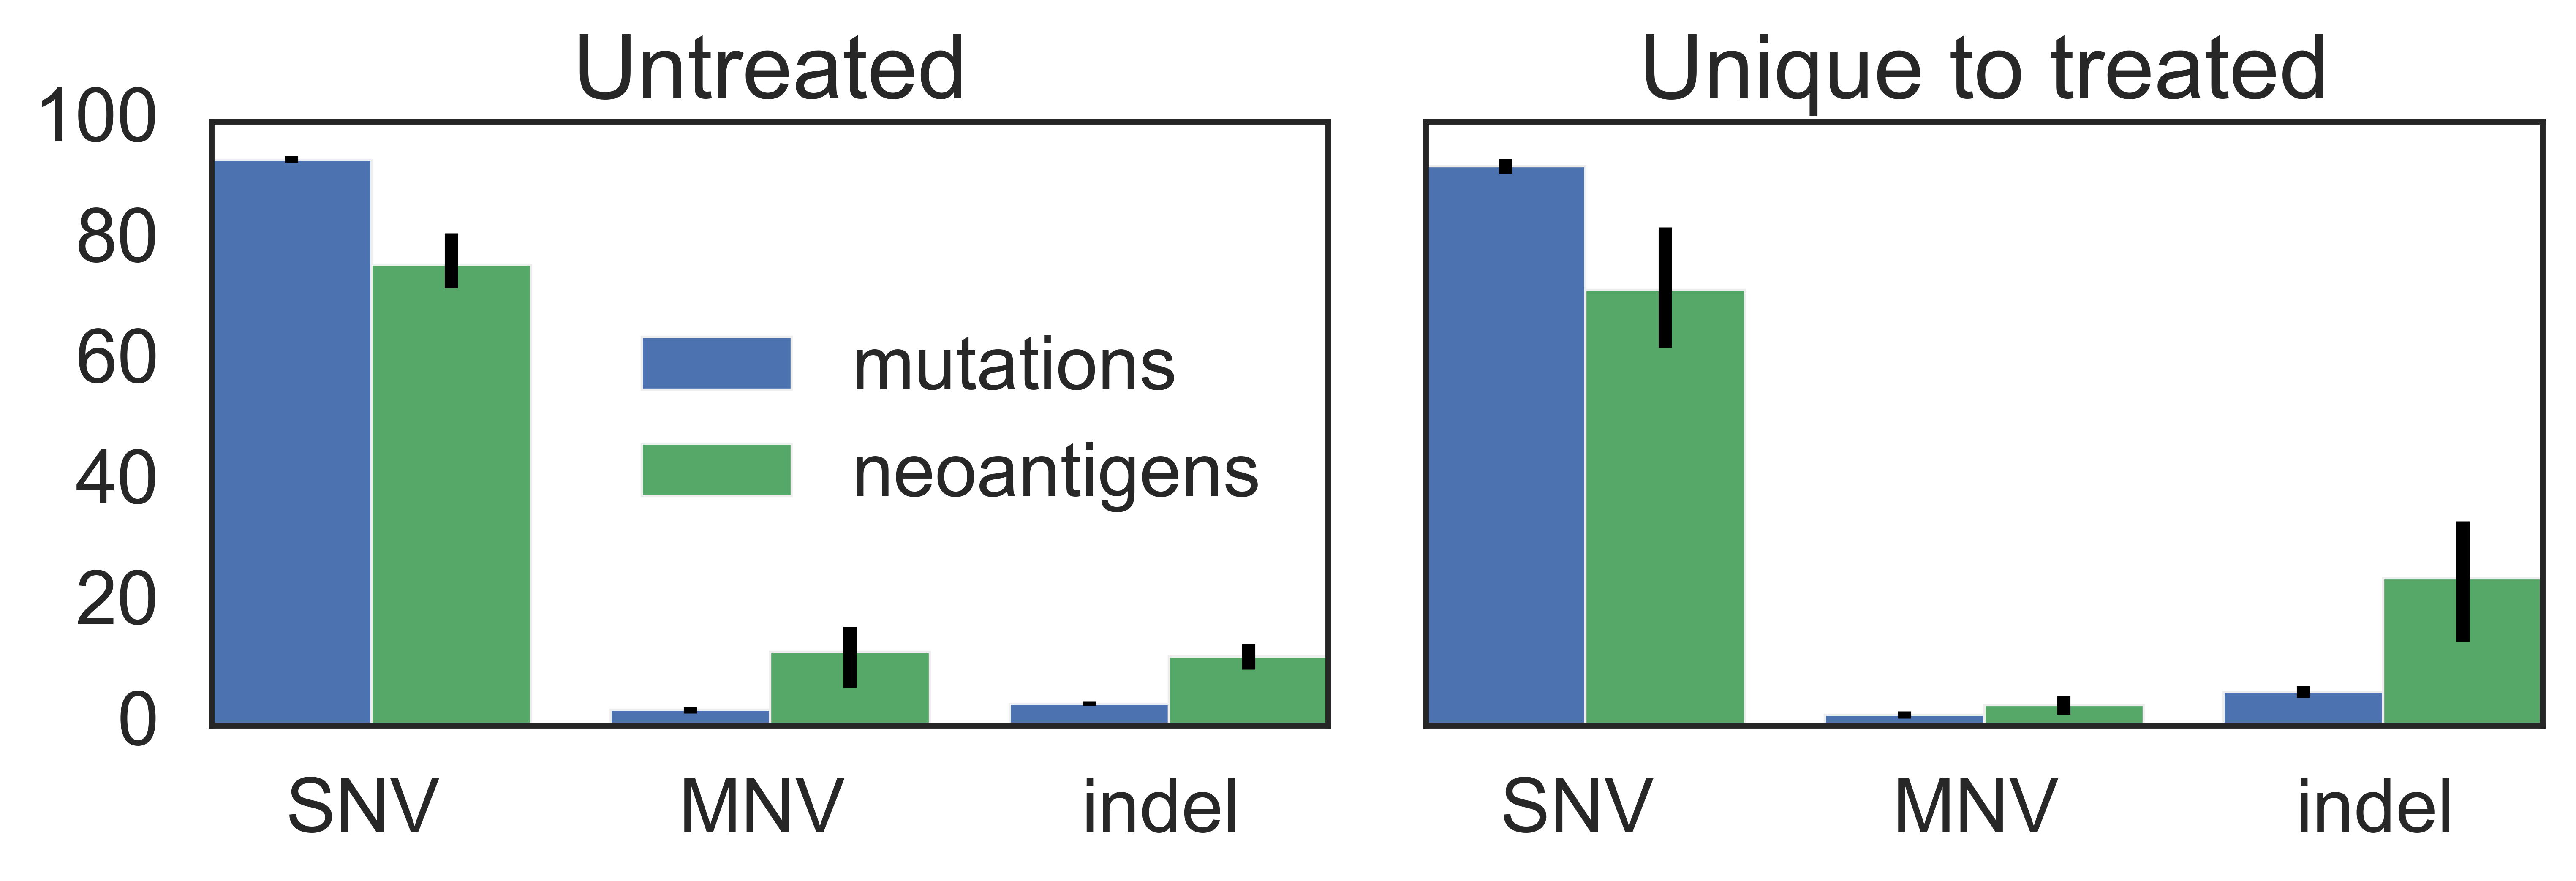

In [27]:
seaborn.set_context("poster")
seaborn.set_style('white')
pyplot.figure(figsize=(8,3))
def plot_dfs(dfs):
    offset = 0
    palette = itertools.cycle(seaborn.color_palette())
    for (label, col) in [("mutations", "mut fraction"), ("neoantigens", "peptide fraction")]:
        indexing = [(True, False), (False, False), (False, True)]
        ys = numpy.array([dfs[1].ix[index][col] for index in indexing]) * 100.0
        error_low = ys - numpy.array([dfs[2].ix[index][col] for index in indexing]) * 100.0
        error_hi = numpy.array([dfs[3].ix[index][col] for index in indexing]) * 100.0 - ys
        xs = numpy.array([1,3.5,6]) + offset
        pyplot.bar(
            xs,
            ys,
            yerr=numpy.array([error_low, error_hi]),
            ecolor="black",
            label=label,
            color=next(palette),
            width=1.0)
        offset += 1
    pyplot.xticks(xs - 0.05, ["SNV", "MNV", "indel"])

pyplot.subplot(121)
plot_dfs(untreated)
pyplot.title("Untreated")
#pyplot.ylabel("percent")
pyplot.legend(loc='center right')
pyplot.ylim(ymin=0, ymax=100)
pyplot.subplot(122)
plot_dfs(unique)
pyplot.title("Unique to treated")
pyplot.ylim(ymin=0, ymax=100)
pyplot.yticks(numpy.arange(0, 100, 20), [""] * 6)
pyplot.tight_layout()

In [28]:
calculate(
    aocs_muts_exon[aocs_muts_exon.unique_to_treated & (aocs_muts_exon.source_id == 'AOCS-034-13/SP101524')])

count  peptides per  sum  peptide fraction  mut fraction
snv  indel                                                          
True False     50          1.82   91                 1             1

In [31]:
sub_exon = aocs_muts_confident_exon.ix[~ aocs_muts_confident_exon.source_id.isin(treated_sources)]
group_sum = sub_exon.groupby(["snv", "indel"]).num_binders.sum()
group_count = sub_exon.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per    sum  peptide fraction  mut fraction
snv   indel                                                            
False False    182      9.170330   1669          0.125649      0.026558
      True     250      6.084000   1521          0.114507      0.036480
True  False   6421      1.571874  10093          0.759843      0.936962

In [32]:
sub_exon = aocs_muts_confident_exon.ix[aocs_muts_confident_exon.source_id.isin(treated_sources)]
group_sum = sub_exon.groupby(["snv", "indel"]).num_binders.sum()
group_count = sub_exon.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per   sum  peptide fraction  mut fraction
snv   indel                                                           
False False    112     16.178571  1812          0.160453      0.023074
      True     162      6.537037  1059          0.093775      0.033375
True  False   4580      1.838865  8422          0.745772      0.943552

In [33]:
group_sum = aocs_muts_confident_exon.groupby(["snv", "indel"]).num_binders.sum()
group_count = aocs_muts_confident_exon.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per    sum  peptide fraction  mut fraction
snv   indel                                                            
False False    294     11.840136   3481          0.141642      0.025113
      True     412      6.262136   2580          0.104980      0.035193
True  False  11001      1.683029  18515          0.753377      0.939694

In [34]:
group_sum = aocs_muts_confident_coding.groupby(["snv", "indel"]).num_binders.sum()
group_count = aocs_muts_confident_coding.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per    sum  peptide fraction  mut fraction
snv   indel                                                            
False False    294     11.840136   3481          0.141642      0.032758
      True     412      6.262136   2580          0.104980      0.045905
True  False   8269      2.239086  18515          0.753377      0.921337

In [35]:
group_sum = aocs_muts_confident_coding_expressed.groupby(["snv", "indel"]).num_binders.sum()
group_count = aocs_muts_confident_coding_expressed.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per   sum  peptide fraction  mut fraction
snv   indel                                                           
False False     88     10.738636   945          0.113965      0.024929
      True      51      4.470588   228          0.027496      0.014448
True  False   3391      2.099381  7119          0.858538      0.960623

In [36]:
(muts_confident.ix[(muts_confident.donor == "AOCS-077") & (muts_confident.num_binders > 500)])

source_id     donor  called  genome contig  \
1076674  AOCS-077-1/SP101572  AOCS-077       1  GRCh37      2   

         interbase_start  interbase_end ref alt    effect  gene  \
1076674        170139453      170139454   -   C  p.H369fs  LRP2   

         context_5_prime  context_3_prime context_mutation  dna_alt_reads  \
1076674  TGGCACAGGTGACGG  CAGGTCGGCTTTCAC              C>C             61   

         dna_ref_reads  dna_total_reads  rna_alt_reads  rna_ref_reads  \
1076674              0               61              0              0   

         rna_total_reads       vaf any_alt_reads    snv      mutation_id  \
1076674                0  0.999998          True  False  2:170139453 ->C   

             site_id  context_A  context_C  context_T  context_G  context_GC  \
1076674  2:170139453   0.166667   0.266667        0.2   0.366667    0.633333   

        unique_to_treated context_mutation_5p context_mutation_3p  \
1076674             False              G(C>C)              (C>C)C   

        context_mutation_3p5p              sources  binding_affinity  \
1076674               G(C>C)C  mutations_with_mnvs              2.78   

        binding_allele  num_alt  num_ref  total_depth binder  \
1076674        A*02:01        0        0            0   True   

                                          binding_peptides  num_binders  \
1076674  {u'NCYFDETD': 43677.82, u'LAIDWAASRLY': 19.0, ...          829   

         indel  interesting  
1076674  False            0

In [37]:
(muts_confident.ix[muts_confident.donor.str.startswith("AOCS")].num_binders).describe()

count    1099184.000000
mean           0.022374
std            0.953729
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max          829.000000
Name: num_binders, dtype: float64

In [38]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "recurrence")]

donor cohort library treated   timepoint metastasis  \
source_id                                                                      
AOCS-094-2/SP106641   AOCS-094   AOCS     WGS    True  recurrence      False   
AOCS-139-4/SP101906   AOCS-139   AOCS     WGS    True  recurrence      False   
AOCS-139-17/SP101901  AOCS-139   AOCS     WGS    True  recurrence       True   
AOCS-139-16/SP101896  AOCS-139   AOCS     WGS    True  recurrence       True   
AOCS-167-4/SP102151   AOCS-167   AOCS     WGS    True  recurrence      False   
AOCS-167-16/SP102148  AOCS-167   AOCS     WGS    True  recurrence       True   

                     tissue_type  interval_days assay paired  \
source_id                                                      
AOCS-094-2/SP106641        solid            758   WGS   True   
AOCS-139-4/SP101906        solid            920   WGS   True   
AOCS-139-17/SP101901       solid            920   WGS   True   
AOCS-139-16/SP101896       solid            920   WGS   True   
AOCS-167-4/SP102151        solid            937   WGS  False   
AOCS-167-16/SP102148       solid            937   WGS  False   

                                 source_id timepoint_paired  protein changing  \
source_id                                                                       
AOCS-094-2/SP106641    AOCS-094-2/SP106641             True               127   
AOCS-139-4/SP101906    AOCS-139-4/SP101906             True               187   
AOCS-139-17/SP101901  AOCS-139-17/SP101901             True               153   
AOCS-139-16/SP101896  AOCS-139-16/SP101896             True               181   
AOCS-167-4/SP102151    AOCS-167-4/SP102151            False                72   
AOCS-167-16/SP102148  AOCS-167-16/SP102148            False                64   

                      peptides  expressed peptides  mutations  \
source_id                                                       
AOCS-094-2/SP106641        423                  53      13649   
AOCS-139-4/SP101906        541                 NaN      21796   
AOCS-139-17/SP101901       456                 NaN      17615   
AOCS-139-16/SP101896       527                 NaN      20816   
AOCS-167-4/SP102151        202                 NaN       9149   
AOCS-167-16/SP102148       168                 NaN       8732   

                      mutations_per_mb  indel  interesting mutations  \
source_id                                                              
AOCS-094-2/SP106641           4.546636     10              18.133197   
AOCS-139-4/SP101906           7.260493     11              22.279317   
AOCS-139-17/SP101901          5.867755     13              20.346296   
AOCS-139-16/SP101896          6.934044      9              21.935050   
AOCS-167-4/SP102151           3.047635      2              18.854520   
AOCS-167-16/SP102148          2.908728      3              19.892350   

                           group      treatment  fraction_peptides_expressed  
source_id                                                                     
AOCS-094-2/SP106641   AOCS solid  chemo treated                     0.125296  
AOCS-139-4/SP101906   AOCS solid  chemo treated                          NaN  
AOCS-139-17/SP101901  AOCS solid  chemo treated                          NaN  
AOCS-139-16/SP101896  AOCS solid  chemo treated                          NaN  
AOCS-167-4/SP102151   AOCS solid  chemo treated                          NaN  
AOCS-167-16/SP102148  AOCS solid  chemo treated                          NaN

In [39]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "primary")]

donor cohort library treated timepoint metastasis  \
source_id                                                                   
AOCS-001-1/SP101515  AOCS-001   AOCS     WGS   False   primary      False   
AOCS-002-1/SP101517  AOCS-002   AOCS     WGS   False   primary      False   
AOCS-004-1/SP101519  AOCS-004   AOCS     WGS   False   primary      False   
AOCS-005-1/SP101521  AOCS-005   AOCS     WGS   False   primary      False   
AOCS-034-1/SP101523  AOCS-034   AOCS     WGS   False   primary      False   
AOCS-055-1/SP101526  AOCS-055   AOCS     WGS   False   primary      False   
AOCS-056-1/SP101528  AOCS-056   AOCS     WGS   False   primary      False   
AOCS-057-1/SP101530  AOCS-057   AOCS     WGS   False   primary      False   
AOCS-058-1/SP101532  AOCS-058   AOCS     WGS   False   primary      False   
AOCS-059-1/SP101536  AOCS-059   AOCS     WGS   False   primary      False   
AOCS-060-1/SP101540  AOCS-060   AOCS     WGS   False   primary      False   
AOCS-061-1/SP101544  AOCS-061   AOCS     WGS   False   primary      False   
AOCS-063-1/SP101548  AOCS-063   AOCS     WGS   False   primary      False   
AOCS-064-1/SP101552  AOCS-064   AOCS     WGS   False   primary      False   
AOCS-065-1/SP101558  AOCS-065   AOCS     WGS   False   primary      False   
AOCS-075-1/SP101564  AOCS-075   AOCS     WGS   False   primary      False   
AOCS-076-1/SP101568  AOCS-076   AOCS     WGS   False   primary      False   
AOCS-077-1/SP101572  AOCS-077   AOCS     WGS    True   primary      False   
AOCS-078-1/SP101576  AOCS-078   AOCS     WGS   False   primary      False   
AOCS-079-1/SP101580  AOCS-079   AOCS     WGS   False   primary      False   
AOCS-080-1/SP101584  AOCS-080   AOCS     WGS   False   primary      False   
AOCS-081-1/SP101588  AOCS-081   AOCS     WGS   False   primary      False   
AOCS-083-1/SP101592  AOCS-083   AOCS     WGS   False   primary      False   
AOCS-084-1/SP101596  AOCS-084   AOCS     WGS   False   primary      False   
AOCS-085-1/SP101600  AOCS-085   AOCS     WGS   False   primary      False   
AOCS-086-1/SP101604  AOCS-086   AOCS     WGS   False   primary      False   
AOCS-088-1/SP101610  AOCS-088   AOCS     WGS   False   primary      False   
AOCS-090-1/SP101616  AOCS-090   AOCS     WGS   False   primary      False   
AOCS-091-1/SP101622  AOCS-091   AOCS     WGS   False   primary      False   
AOCS-092-1/SP101628  AOCS-092   AOCS     WGS   False   primary      False   
...                       ...    ...     ...     ...       ...        ...   
AOCS-126-1/SP101785  AOCS-126   AOCS     WGS   False   primary      False   
AOCS-128-1/SP101795  AOCS-128   AOCS     WGS   False   primary      False   
AOCS-130-1/SP101805  AOCS-130   AOCS     WGS   False   primary      False   
AOCS-131-1/SP101815  AOCS-131   AOCS     WGS   False   primary      False   
AOCS-132-1/SP101825  AOCS-132   AOCS     WGS   False   primary      False   
AOCS-133-1/SP101835  AOCS-133   AOCS     WGS   False   primary      False   
AOCS-139-1/SP101891  AOCS-139   AOCS     WGS   False   primary      False   
AOCS-143-1/SP101941  AOCS-143   AOCS     WGS   False   primary      False   
AOCS-144-1/SP101951  AOCS-144   AOCS     WGS   False   primary      False   
AOCS-145-1/SP101961  AOCS-145   AOCS     WGS   False   primary      False   
AOCS-146-1/SP101971  AOCS-146   AOCS     WGS   False   primary      False   
AOCS-147-1/SP101981  AOCS-147   AOCS     WGS   False   primary      False   
AOCS-148-1/SP101990  AOCS-148   AOCS     WGS   False   primary      False   
AOCS-149-1/SP102000  AOCS-149   AOCS     WGS   False   primary      False   
AOCS-152-1/SP102025  AOCS-152   AOCS     WGS   False   primary      False   
AOCS-153-1/SP102035  AOCS-153   AOCS     WGS   False   primary      False   
AOCS-157-1/SP102055  AOCS-157   AOCS     WGS   False   primary      False   
AOCS-158-1/SP102064  AOCS-158   AOCS     WGS    True   primary      False   
AOCS-159-1/SP102074  AOCS-159   AOCS     WGS   False   primary      False   
AOCS-160-1/SP102084 

In [40]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "recurrence")]

donor cohort library treated   timepoint metastasis  \
source_id                                                                      
AOCS-094-2/SP106641   AOCS-094   AOCS     WGS    True  recurrence      False   
AOCS-139-4/SP101906   AOCS-139   AOCS     WGS    True  recurrence      False   
AOCS-139-17/SP101901  AOCS-139   AOCS     WGS    True  recurrence       True   
AOCS-139-16/SP101896  AOCS-139   AOCS     WGS    True  recurrence       True   
AOCS-167-4/SP102151   AOCS-167   AOCS     WGS    True  recurrence      False   
AOCS-167-16/SP102148  AOCS-167   AOCS     WGS    True  recurrence       True   

                     tissue_type  interval_days assay paired  \
source_id                                                      
AOCS-094-2/SP106641        solid            758   WGS   True   
AOCS-139-4/SP101906        solid            920   WGS   True   
AOCS-139-17/SP101901       solid            920   WGS   True   
AOCS-139-16/SP101896       solid            920   WGS   True   
AOCS-167-4/SP102151        solid            937   WGS  False   
AOCS-167-16/SP102148       solid            937   WGS  False   

                                 source_id timepoint_paired  protein changing  \
source_id                                                                       
AOCS-094-2/SP106641    AOCS-094-2/SP106641             True               127   
AOCS-139-4/SP101906    AOCS-139-4/SP101906             True               187   
AOCS-139-17/SP101901  AOCS-139-17/SP101901             True               153   
AOCS-139-16/SP101896  AOCS-139-16/SP101896             True               181   
AOCS-167-4/SP102151    AOCS-167-4/SP102151            False                72   
AOCS-167-16/SP102148  AOCS-167-16/SP102148            False                64   

                      peptides  expressed peptides  mutations  \
source_id                                                       
AOCS-094-2/SP106641        423                  53      13649   
AOCS-139-4/SP101906        541                 NaN      21796   
AOCS-139-17/SP101901       456                 NaN      17615   
AOCS-139-16/SP101896       527                 NaN      20816   
AOCS-167-4/SP102151        202                 NaN       9149   
AOCS-167-16/SP102148       168                 NaN       8732   

                      mutations_per_mb  indel  interesting mutations  \
source_id                                                              
AOCS-094-2/SP106641           4.546636     10              18.133197   
AOCS-139-4/SP101906           7.260493     11              22.279317   
AOCS-139-17/SP101901          5.867755     13              20.346296   
AOCS-139-16/SP101896          6.934044      9              21.935050   
AOCS-167-4/SP102151           3.047635      2              18.854520   
AOCS-167-16/SP102148          2.908728      3              19.892350   

                           group      treatment  fraction_peptides_expressed  
source_id                                                                     
AOCS-094-2/SP106641   AOCS solid  chemo treated                     0.125296  
AOCS-139-4/SP101906   AOCS solid  chemo treated                          NaN  
AOCS-139-17/SP101901  AOCS solid  chemo treated                          NaN  
AOCS-139-16/SP101896  AOCS solid  chemo treated                          NaN  
AOCS-167-4/SP102151   AOCS solid  chemo treated                          NaN  
AOCS-167-16/SP102148  AOCS solid  chemo treated                          NaN

In [41]:
p_df = collections.defaultdict(list)
for cohort in ["AOCS"]:
    print(cohort)
    for tissue_type in ["ascites", "solid"]:
        for item in ["mutations_per_mb", "peptides", "expressed peptides", "fraction_peptides_expressed"]:
            #sub_sources = sources[sources.group == group]
            sub_sources = sources[(sources.tissue_type == tissue_type) & (sources.cohort == cohort)]
            #sub_sources = sub_sources.ix[sub_sources["expressed peptides"] > 0]
            p_value = scipy.stats.mannwhitneyu(sub_sources[~ sub_sources.treated][item],
                                     sub_sources[sub_sources.treated][item],
                 alternative="two-sided")
            #print(cohort, tissue_type, item, p_value)
            p_df["tissue_type"].append(tissue_type)
            p_df["item"].append(item)
            p_df["cohort"].append(cohort)
            p_df["p-value"].append(p_value.pvalue)
            p_df["num treated"].append(sub_sources[sub_sources.treated][item].dropna().shape[0])
            p_df["num untreated"].append(sub_sources[~ sub_sources.treated][item].dropna().shape[0])
            p_df["treated"].append(sub_sources[sub_sources.treated][item].mean())
            p_df["treated range"].append(bootstrap(sub_sources[sub_sources.treated][item]))
            p_df["untreated"].append(sub_sources[~ sub_sources.treated][item].mean())
            p_df["untreated range"].append(bootstrap(sub_sources[~ sub_sources.treated][item]))


p_df = pandas.DataFrame(p_df).dropna()

p_df_latex = p_df.copy()
del p_df_latex["cohort"]
p_df_latex["p-value"] = [
    "%0.3f%s%s" % (
        row['p-value'], '*' if row['p-value'] < .05 else '', " (decrease)" if row.treated < row.untreated else '')
    for (_, row) in p_df_latex.iterrows()
]
p_df_latex["untreated"] = ["%0.2f (%0.2f-%0.2f)" % ((row.untreated,) + row["untreated range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex["treated"] = ["%0.2f (%0.2f-%0.2f)" % ((row.treated,) + row["treated range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex.item = p_df_latex.item.map(lambda x: {
        "mutations_per_mb": "mutations / mb",
        "fraction_peptides_expressed": "fraction expressed",

    }.get(x, x))

p_df_latex = p_df_latex[["tissue_type", "item", "num untreated", "untreated", "num treated", "treated", "p-value"]]
p_df_latex = p_df_latex.set_index(["tissue_type", "item"])
print(p_df_latex.to_latex(index=True))
p_df_latex

AOCS
\begin{tabular}{llrlrll}
\toprule
        &                    &  num untreated &               untreated &  num treated &                 treated &            p-value \\
\midrule
ascites & mutations / mb &                &                         &              &                         &                    \\
        & peptides &              4 &        3.44 (3.19-3.70) &           24 &        4.58 (4.14-5.03) &              0.082 \\
        & expressed peptides &              4 &  205.25 (135.75-269.25) &           24 &  303.00 (255.79-351.42) &              0.174 \\
        & fraction expressed &              4 &    81.50 (50.00-113.00) &           20 &  148.65 (123.30-175.30) &              0.054 \\
solid & mutations / mb &              4 &        0.38 (0.31-0.44) &           20 &        0.49 (0.45-0.53) &             0.029* \\
        & peptides &             75 &        2.63 (2.35-2.96) &           12 &        3.75 (2.80-4.74) &              0.060 \\
        & expressed pep

num untreated               untreated  \
tissue_type item                                                        
ascites     mutations / mb                  4        3.44 (3.19-3.70)   
            peptides                        4  205.25 (135.75-269.25)   
            expressed peptides              4    81.50 (50.00-113.00)   
            fraction expressed              4        0.38 (0.31-0.44)   
solid       mutations / mb                 75        2.63 (2.35-2.96)   
            peptides                       75  166.33 (141.67-193.71)   
            expressed peptides             69     69.52 (58.14-82.99)   
            fraction expressed             69        0.42 (0.39-0.45)   

                                num treated                 treated  \
tissue_type item                                                      
ascites     mutations / mb               24        4.58 (4.14-5.03)   
            peptides                     24  303.00 (255.79-351.42)   
            expressed peptides           20  148.65 (123.30-175.30)   
            fraction expressed           20        0.49 (0.45-0.53)   
solid       mutations / mb               12        3.75 (2.80-4.74)   
            peptides                     12  335.42 (221.91-451.75)   
            expressed peptides            5     41.20 (28.80-52.40)   
            fraction expressed            5        0.18 (0.11-0.29)   

                                          p-value  
tissue_type item                                   
ascites     mutations / mb                  0.082  
            peptides                        0.174  
            expressed peptides              0.054  
            fraction expressed             0.029*  
solid       mutations / mb                  0.060  
            peptides                       0.015*  
            expressed peptides  0.039* (decrease)  
            fraction expressed   0.250 (decrease)

In [42]:
p_df = collections.defaultdict(list)
for cohort in ["AOCS"]:
    print(cohort)
    for tissue_type in ["ascites", "solid"]:
        for item in ["mutations_per_mb", "peptides", "expressed peptides"]:
            #sub_sources = sources[sources.group == group]
            sub_sources = sources[(sources.tissue_type == tissue_type) & (sources.cohort == cohort)]
            p_value = scipy.stats.mannwhitneyu(sub_sources[sub_sources.timepoint == "primary"][item],
                                     sub_sources[sub_sources.timepoint != "primary"][item],
                 alternative="two-sided")
            #print(cohort, tissue_type, item, p_value)
            p_df["tissue_type"].append(tissue_type)
            p_df["item"].append(item)
            p_df["cohort"].append(cohort)
            p_df["p-value"].append(p_value.pvalue)
            p_df["num recurrence"].append(sub_sources[sub_sources.timepoint != "primary"][item].dropna().shape[0])
            p_df["num primary"].append(sub_sources[sub_sources.timepoint == "primary"][item].dropna().shape[0])
            p_df["recurrence"].append(sub_sources[sub_sources.timepoint != "primary"][item].mean())
            p_df["recurrence range"].append(bootstrap(sub_sources[sub_sources.timepoint != "primary"][item]))
            p_df["primary"].append(sub_sources[sub_sources.timepoint == "primary"][item].mean())
            p_df["primary range"].append(bootstrap(sub_sources[sub_sources.timepoint == "primary"][item]))


p_df = pandas.DataFrame(p_df).dropna()

p_df_latex = p_df.copy()
del p_df_latex["cohort"]
p_df_latex["p-value"] = [
    "%0.3f%s%s" % (
        row['p-value'], '*' if row['p-value'] < .05 else '', " (decrease)" if row.recurrence < row.primary else '')
    for (_, row) in p_df_latex.iterrows()
]
p_df_latex["primary"] = ["%0.1f (%0.1f-%0.1f)" % ((row.primary,) + row["primary range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex["recurrence"] = ["%0.1f (%0.1f-%0.1f)" % ((row.recurrence,) + row["recurrence range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex.item = p_df_latex.item.map(lambda x: {"mutations_per_mb": "mutations / mb"}.get(x, x))
p_df_latex = p_df_latex[["tissue_type", "item", "num primary", "primary", "num recurrence", "recurrence", "p-value"]]
p_df_latex = p_df_latex.set_index(["tissue_type", "item"])
print(p_df_latex.to_latex(index=True))
p_df_latex

AOCS
\begin{tabular}{llrlrll}
\toprule
        &                    &  num primary &              primary &  num recurrence &           recurrence &            p-value \\
\midrule
ascites & mutations / mb &              &                      &                 &                      &                    \\
        & peptides &            4 &        3.4 (3.2-3.7) &              24 &        4.6 (4.1-5.0) &              0.082 \\
        & expressed peptides &            4 &  205.2 (135.8-269.2) &              24 &  303.0 (254.8-351.6) &              0.174 \\
solid & mutations / mb &            4 &    81.5 (50.0-113.0) &              20 &  148.7 (124.0-175.3) &              0.054 \\
        & peptides &           81 &        2.6 (2.3-2.9) &               6 &        5.1 (3.9-6.2) &             0.001* \\
        & expressed peptides &           81 &  175.1 (147.4-205.7) &               6 &  386.2 (281.7-485.2) &             0.002* \\
\bottomrule
\end{tabular}



num primary              primary  \
tissue_type item                                                   
ascites     mutations / mb                4        3.4 (3.2-3.7)   
            peptides                      4  205.2 (135.8-269.2)   
            expressed peptides            4    81.5 (50.0-113.0)   
solid       mutations / mb               81        2.6 (2.3-2.9)   
            peptides                     81  175.1 (147.4-205.7)   
            expressed peptides           73     67.8 (56.6-80.5)   

                                num recurrence           recurrence  \
tissue_type item                                                      
ascites     mutations / mb                  24        4.6 (4.1-5.0)   
            peptides                        24  303.0 (254.8-351.6)   
            expressed peptides              20  148.7 (124.0-175.3)   
solid       mutations / mb                   6        5.1 (3.9-6.2)   
            peptides                         6  386.2 (281.7-485.2)   
            expressed peptides               1       53.0 (nan-nan)   

                                          p-value  
tissue_type item                                   
ascites     mutations / mb                  0.082  
            peptides                        0.174  
            expressed peptides              0.054  
solid       mutations / mb                 0.001*  
            peptides                       0.002*  
            expressed peptides  0.003* (decrease)

In [43]:
print(p_df_latex.to_latex(index=True))
p_df_latex

\begin{tabular}{llrlrll}
\toprule
        &                    &  num primary &              primary &  num recurrence &           recurrence &            p-value \\
\midrule
ascites & mutations / mb &              &                      &                 &                      &                    \\
        & peptides &            4 &        3.4 (3.2-3.7) &              24 &        4.6 (4.1-5.0) &              0.082 \\
        & expressed peptides &            4 &  205.2 (135.8-269.2) &              24 &  303.0 (254.8-351.6) &              0.174 \\
solid & mutations / mb &            4 &    81.5 (50.0-113.0) &              20 &  148.7 (124.0-175.3) &              0.054 \\
        & peptides &           81 &        2.6 (2.3-2.9) &               6 &        5.1 (3.9-6.2) &             0.001* \\
        & expressed peptides &           81 &  175.1 (147.4-205.7) &               6 &  386.2 (281.7-485.2) &             0.002* \\
\bottomrule
\end{tabular}



num primary              primary  \
tissue_type item                                                   
ascites     mutations / mb                4        3.4 (3.2-3.7)   
            peptides                      4  205.2 (135.8-269.2)   
            expressed peptides            4    81.5 (50.0-113.0)   
solid       mutations / mb               81        2.6 (2.3-2.9)   
            peptides                     81  175.1 (147.4-205.7)   
            expressed peptides           73     67.8 (56.6-80.5)   

                                num recurrence           recurrence  \
tissue_type item                                                      
ascites     mutations / mb                  24        4.6 (4.1-5.0)   
            peptides                        24  303.0 (254.8-351.6)   
            expressed peptides              20  148.7 (124.0-175.3)   
solid       mutations / mb                   6        5.1 (3.9-6.2)   
            peptides                         6  386.2 (281.7-485.2)   
            expressed peptides               1       53.0 (nan-nan)   

                                          p-value  
tissue_type item                                   
ascites     mutations / mb                  0.082  
            peptides                        0.174  
            expressed peptides              0.054  
solid       mutations / mb                 0.001*  
            peptides                       0.002*  
            expressed peptides  0.003* (decrease)

In [44]:
p_df = collections.defaultdict(list)
for item in ["peptides", "mutations_per_mb"]:
    for group in ["AOCS solid", "AOCS ascites", "TCGA solid", "PT189 solid"]:
        #sub_sources = sources[sources.group == group]
        sub_sources = sources
        p_value = scipy.stats.mannwhitneyu(sub_sources[~ sub_sources.treated][item],
                                 sub_sources[sub_sources.treated][item],
             alternative="two-sided")
        print(group, item, p_value)
        p_df["item"].append(item)
        p_df["group"].append(group)
        p_df["p-value"].append(p_value.pvalue)

p_df = pandas.DataFrame(p_df)
p_df
print(p_df.ix[p_df.item == "neoantigens"][["group", "p-value"]].to_latex(index=False))
p_df[["group", "p-value"]]
p_df

('AOCS solid', 'peptides', MannwhitneyuResult(statistic=641.5, pvalue=1.2067206132772203e-06))
('AOCS ascites', 'peptides', MannwhitneyuResult(statistic=641.5, pvalue=1.2067206132772203e-06))
('TCGA solid', 'peptides', MannwhitneyuResult(statistic=641.5, pvalue=1.2067206132772203e-06))
('PT189 solid', 'peptides', MannwhitneyuResult(statistic=641.5, pvalue=1.2067206132772203e-06))
('AOCS solid', 'mutations_per_mb', MannwhitneyuResult(statistic=543.5, pvalue=5.4832426436964876e-08))
('AOCS ascites', 'mutations_per_mb', MannwhitneyuResult(statistic=543.5, pvalue=5.4832426436964876e-08))
('TCGA solid', 'mutations_per_mb', MannwhitneyuResult(statistic=543.5, pvalue=5.4832426436964876e-08))
('PT189 solid', 'mutations_per_mb', MannwhitneyuResult(statistic=543.5, pvalue=5.4832426436964876e-08))
\begin{tabular}{lr}
\toprule
Empty DataFrame
Columns: Index([u'group', u'p-value'], dtype='object')
Index: Int64Index([], dtype='int64') \\
\bottomrule
\end{tabular}



group              item       p-value
0    AOCS solid          peptides  1.206721e-06
1  AOCS ascites          peptides  1.206721e-06
2    TCGA solid          peptides  1.206721e-06
3   PT189 solid          peptides  1.206721e-06
4    AOCS solid  mutations_per_mb  5.483243e-08
5  AOCS ascites  mutations_per_mb  5.483243e-08
6    TCGA solid  mutations_per_mb  5.483243e-08
7   PT189 solid  mutations_per_mb  5.483243e-08

In [45]:
seaborn.boxplot(data=sources[sources.cohort == "AOCS"], x="group", y="interesting mutations", hue="treatment", hue_order=("treatment naive", "chemo treated"))


In [46]:
mutations.ix[mutations.binding_affinity > 0].shape

(9972, 45)

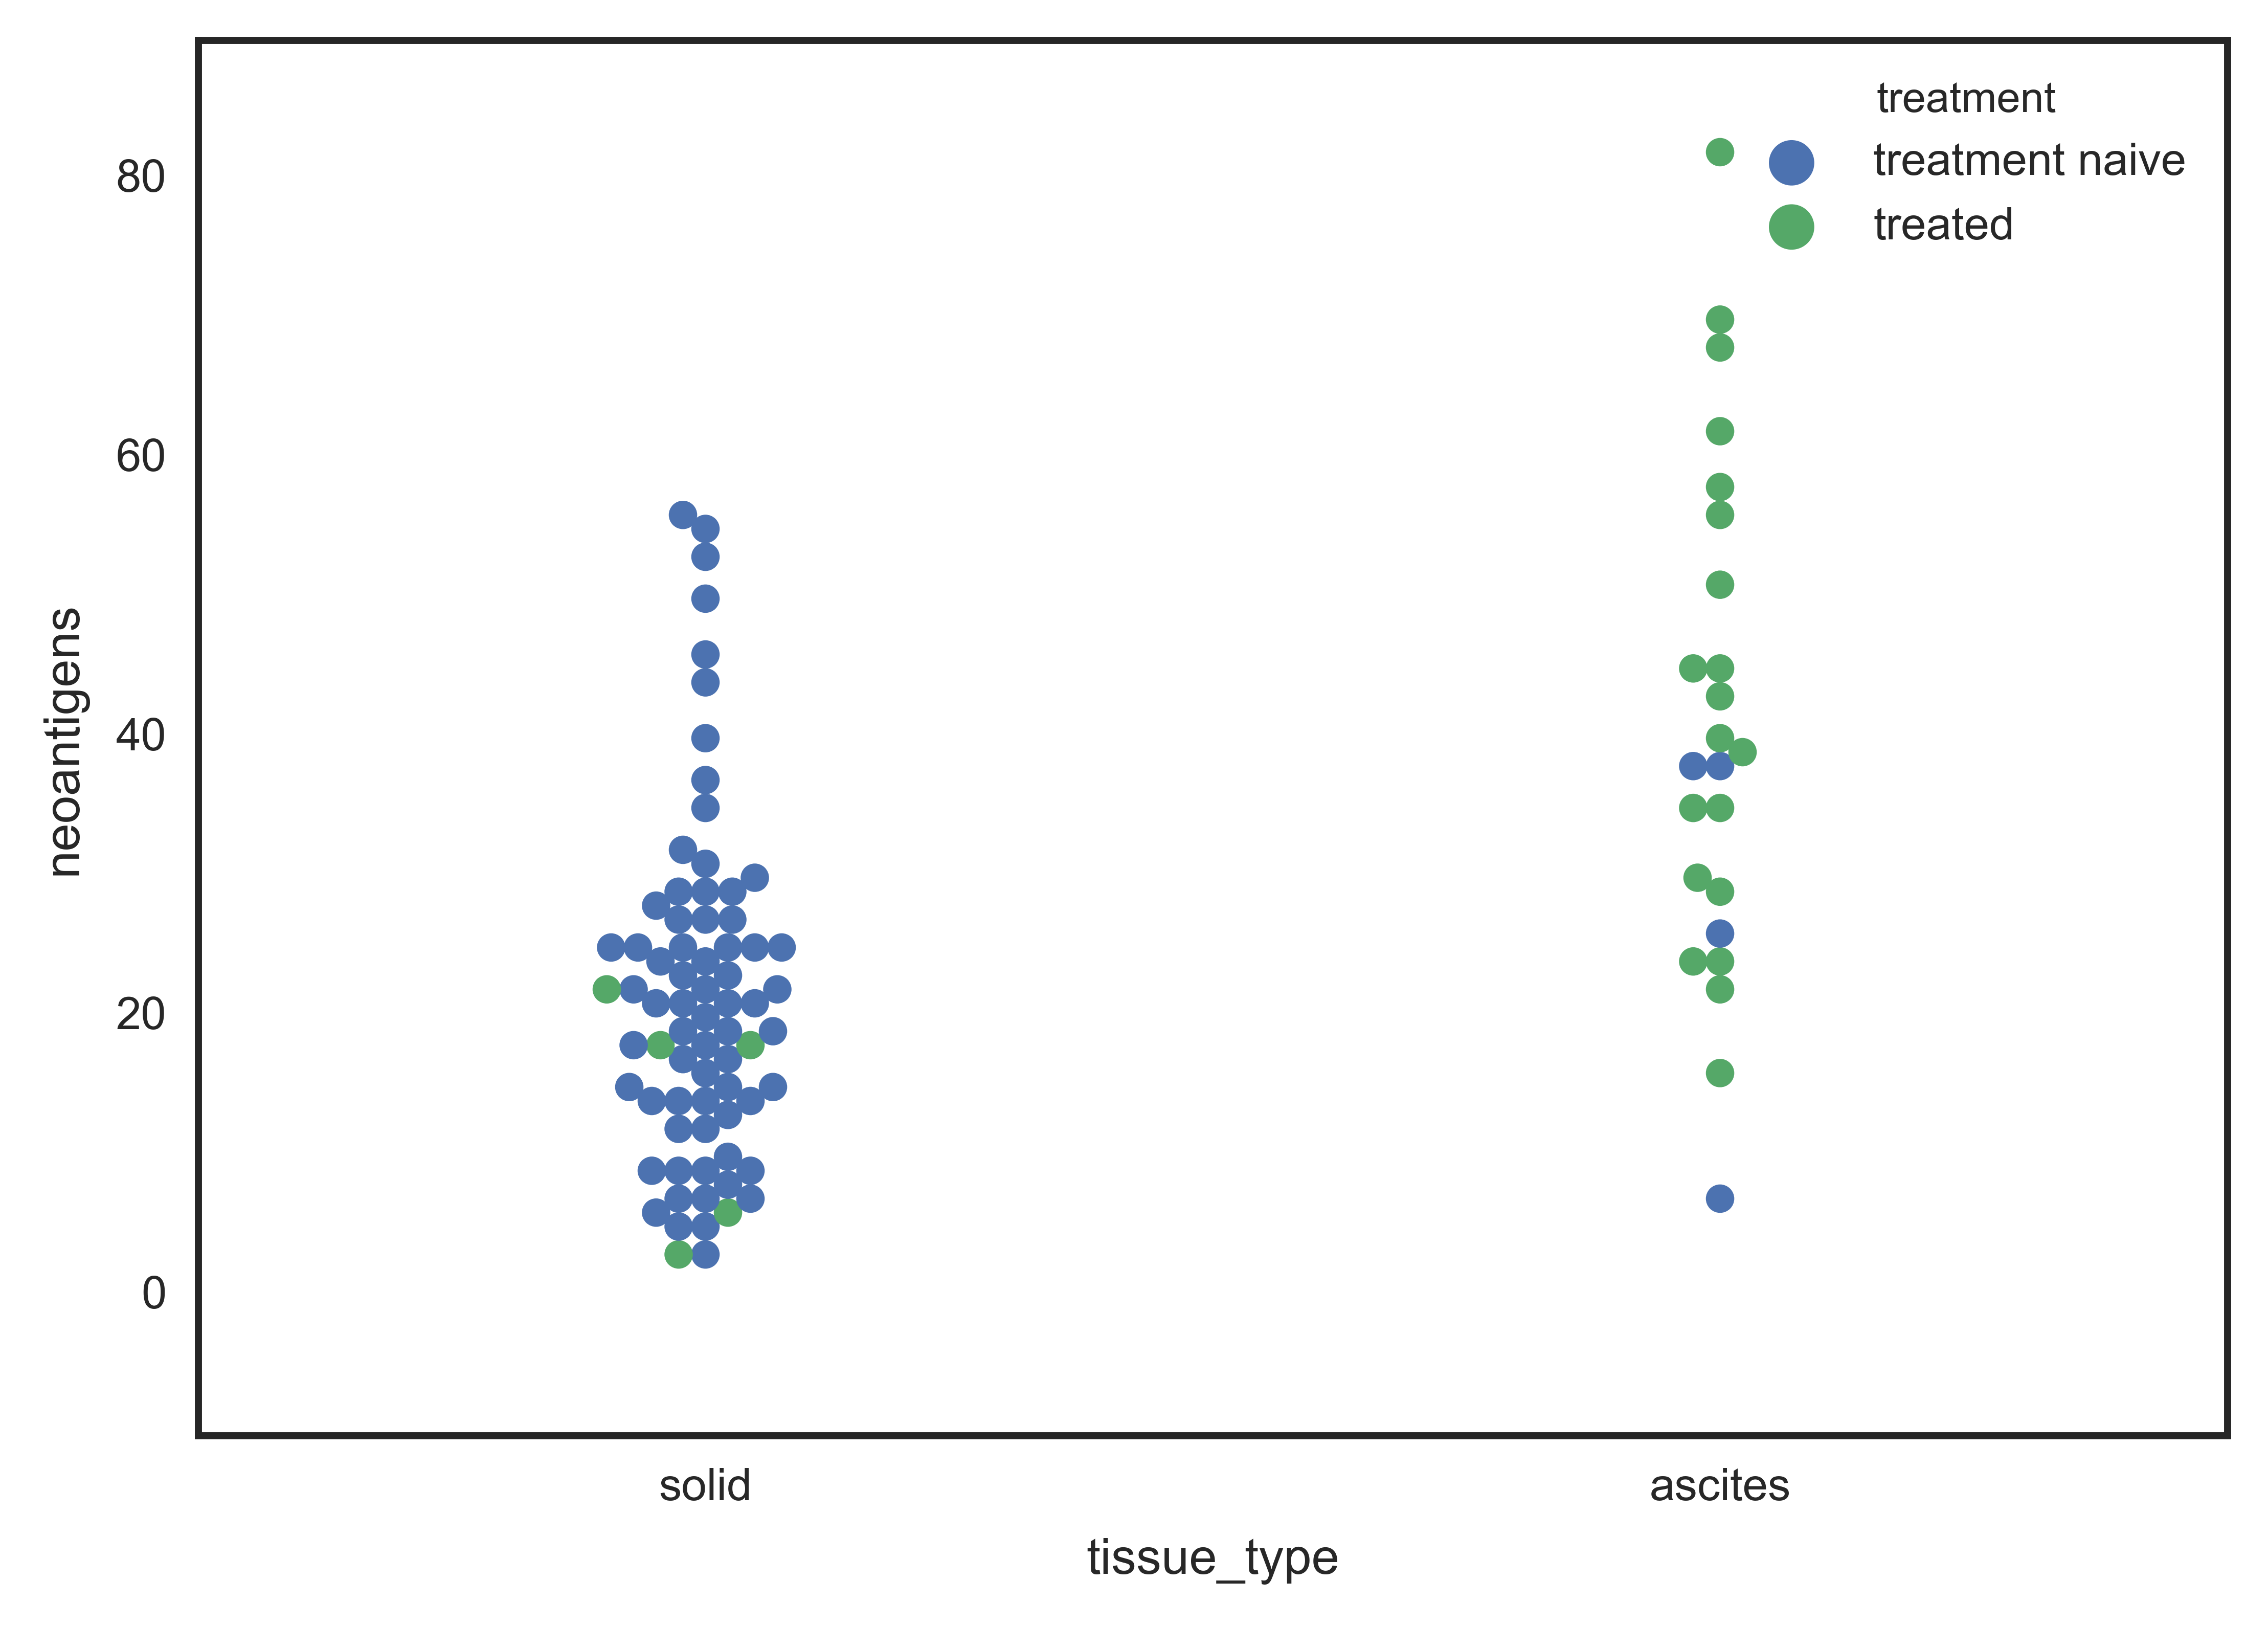

In [47]:
df = mutations.ix[~ mutations.rna_alt_reads.isnull()].ix[
    (
        (mutations.called == 1) |
        (
            (mutations.dna_alt_reads > 10)
        )
    )
    & mutations.binder
    & (mutations.rna_alt_reads > 2)
].groupby("source_id").donor.count().to_frame().reset_index()
df.index = df.source_id
#del df["source_id"]
df.columns = ["source_id", "neoantigens"]
df["donor"] = sources.donor[df.index]
df["treated"] = sources.treated[df.index]
df["treatment"] = df.treated.map({True: "treated", False: "treatment naive"})
df["tissue_type"] = sources.tissue_type[df.index]

seaborn.set_context('paper')
#seaborn.boxplot(data=df, x="tissue_type", y="neoantigens", hue="treatment")
seaborn.swarmplot(data=df, x="tissue_type", y="neoantigens", hue="treatment")


In [48]:
def source_display_name(name):
    return name

def abbreviated_source_display_name(name):
    return (name.split('/')[0]
            .replace("primary_", "")
            .replace("secondary_", "")
            .replace("left", "L")
            .replace("right", "R")
            .replace("pelvic_sidewalls", "sidewalls")
            .replace("end_of_care", "final"))
    
source_display_name = abbreviated_source_display_name

def series_signficance(series):    
    df = series.to_frame()
    (col,) = df.columns
    df["donor"] = sources.donor[df.index]
    df["treated"] = sources.treated[df.index]
    grouped = df.dropna().groupby(["donor", "treated"]).median().unstack().dropna()
    grouped["compare"] = (grouped[(col, False)] < grouped[(col, True)])
    
    counts = grouped["compare"].value_counts()
    print("Treated > untreated in %d of %d, p=%f. Mean change: %s absolute, percent: %s" % (
            counts.get(True, 0),
            counts.sum(),
            scipy.stats.binom_test([counts.get(True, 0), counts.get(False, 0)]),
            mean_with_errorbars(grouped[(col, True)] - grouped[(col, False)]),
            mean_with_errorbars(grouped[(col, True)] * 100.0 / grouped[(col, False)])
        ))
    counts
    
def plot_series(series, only_multiple=True, color_column='timepoint', use_hatch=False, figsize=(18,5), order='donor', legend_loc='upper right', legend=True, legend_bbox_to_anchor=None):
    if isinstance(series.tolist()[0], (list, numpy.ndarray)) and series.tolist()[0][0] in (True, False):
        df = pandas.DataFrame(collections.OrderedDict([
                ("value", [numpy.mean(x) for x in series]),
                ("low", [numpy.mean(x) - numpy.sqrt((numpy.mean(x) * (1 - numpy.mean(x)) / len(x))) for x in series]),
                ("high", [numpy.mean(x) + numpy.sqrt((numpy.mean(x) * (1 - numpy.mean(x)) / len(x))) for x in series]),
        ]), index=series.index)
        df = df * 100.0
    elif isinstance(series.tolist()[0], (list, numpy.ndarray)):
        df = pandas.DataFrame(collections.OrderedDict([
                ("value", [numpy.mean(x) for x in series]),
                ("low", [numpy.percentile(x, 5) for x in series]),
                ("high", [numpy.percentile(x, 95) for x in series]),
        ]), index=series.index)
    else:
        df = pandas.DataFrame({"value": series}, index=series.index)
    
    series_signficance(df.value)
    
    if order == 'donor':
        def sort_key(source):
            return (sources.ix[source].donor, sources.ix[source].interval_days, sources.ix[source].treated)
    elif order == 'num_sources':
         def sort_key(source):
            donor = sources.ix[source].donor
            num_treated = len([s for s in sources.index if sources.ix[s].donor == donor and sources.ix[s].treated])
            num_sources = len([s for s in sources.index if sources.ix[s].donor == donor])
            return (num_treated * -1, num_sources * -1, donor, sources.ix[source].interval_days, sources.ix[source].treated)
    else:
        raise ValueError("Unknown ordering %s" % order)
            
    sources_ordered = sorted(df.index.tolist(), key=sort_key)
    if only_multiple:
        sources_ordered = [
            s for s in sources_ordered if len(set(
                [sources.ix[other_source].treated for other_source in sources.ix[sources_ordered].ix[sources.donor == sources.ix[s].donor].index])) > 1
        ]
    
    df = df.ix[sources_ordered]

    adjacent_space = 0
    minor_space = 0
    major_space = 2
    bar_width = 2

    colors = []
    
    def color_and_hatch(info):
        color = None
        hatch = None
        primary_like = None
        if color_column == 'timepoint':
            primary_like = info['timepoint'] == "primary"    
        elif color_column == 'treated':
            primary_like = not info['treated']
        else:
            assert False
        
        if use_hatch:
            primary_color = seaborn.color_palette("deep")[0]
            recurrence_color = seaborn.color_palette("deep")[1]
            hatch = '/' if info['tissue_type'] == 'ascites' else None
            color = primary_color if primary_like else recurrence_color
        else:
            primary_colors = seaborn.color_palette("Blues")
            recurrence_colors = seaborn.color_palette("Greens")
            index = 3 if info['tissue_type'] == 'ascites' else -1
            color = (primary_colors if primary_like else recurrence_colors)[index]
        return (color, hatch)


    for source in sources_ordered:
        colors.append(color_and_hatch(sources.ix[source])[0])

    x_values = [bar_width]
    for (prev_source_i, source) in enumerate(sources_ordered[1:]):
        prev_source = sources_ordered[prev_source_i]
        x_increment = None
        if sources.ix[prev_source].donor != sources.ix[source].donor:
            x_increment = major_space
        elif sources.ix[prev_source].interval_days != sources.ix[source].interval_days:
            x_increment = minor_space
        else:
            x_increment = adjacent_space
        x_values.append(x_values[-1] + bar_width + x_increment)
    x_values = numpy.array(x_values)

    #seaborn.set_context("talk")
    #pyplot.figure(figsize=figsize)
    bars = pyplot.bar(
        x_values,
        df.value,
        bar_width,
        yerr=[df.value - df.low, df.high - df.value] if 'low' in df else None,
        error_kw={
            'ecolor': 'black',
            'capsize': 3,
            'elinewidth': 4
        },
        color = colors)
    for (bar, source) in zip(bars, sources_ordered):
        hatch = color_and_hatch(sources.ix[source])[1]
        if hatch is not None:
            bar.set_hatch(hatch)

    ax = pyplot.gca()
    #pyplot.xticks(x_values + bar_width / 2, [source_display_name(s) for s in sources_ordered], rotation="vertical")
    pyplot.xticks(x_values + bar_width / 2, ["" for s in sources_ordered], rotation="vertical")
    pyplot.grid(False)
    ax.yaxis.grid(True, color='black', linestyle='--', linewidth=1)
    ax.patch.set_facecolor("None")
    pyplot.xlim(xmin=0, xmax=x_values.max() + bar_width + 5)

    #dummies = [ax.plot([], [], ls='-', c=c)[0] for c in color_map.values()]
    #ax.legend(dummies, [" ".join(tpl) for tpl in color_map], fontsize='xx-large', ncol=2)

    if legend:
        class CustomLegend(object):
            def __init__(self, color, hatch=None):
                self.color = color
                self.hatch = hatch

            def legend_artist(self, legend, orig_handle, fontsize, handlebox):
                x0, y0 = handlebox.xdescent, handlebox.ydescent
                width, height = handlebox.width, handlebox.height
                patch = matplotlib.patches.Rectangle([x0, y0], width, height, facecolor=self.color,
                                           edgecolor=None, hatch=self.hatch, lw=0,
                                           transform=handlebox.get_transform())
                handlebox.add_artist(patch)
                return patch

        class PrimarySolidLegend(object):
            label = "primary solid" if color_column == 'timepoint' else "untreated solid"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'primary', 'treated': False, 'tissue_type': 'solid'}))

        class RecurrenceSolidLegend(object):
            label = "recurrence solid" if color_column == 'timepoint' else "treated solid"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'recurrence', 'treated': True, 'tissue_type': 'solid'}))

        class PrimaryAscitesLegend(object):
            label = "primary ascites" if color_column == 'timepoint' else "untreated ascites"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'primary', 'treated': False, 'tissue_type': 'ascites'}))

        class RecurrenceAscitesLegend(object):
            label = "recurrence ascites" if color_column == 'timepoint' else "treated ascites"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'recurrence', 'treated': True, 'tissue_type': 'ascites'}))

        legend_classes = [PrimarySolidLegend(), PrimaryAscitesLegend(), RecurrenceSolidLegend(), RecurrenceAscitesLegend()]


        leg = pyplot.legend(legend_classes, [x.label for x in legend_classes],
                      handler_map = dict((c, c.handler) for c in legend_classes),
                      bbox_to_anchor=legend_bbox_to_anchor,
                      loc=legend_loc, ncol=4)
        leg.set_frame_on(True)

#series = mutations_any_alt_reads.groupby("source_id")["donor"].count()
#plot_series(series, use_hatch=False)


Treated > untreated in 11 of 12, p=0.006348. Mean change: 2 (1 - 2) absolute, percent: 162 (140 - 190)
Treated > untreated in 10 of 12, p=0.038574. Mean change: 65 (11 - 120) absolute, percent: 136 (120 - 150)
Treated > untreated in 8 of 11, p=0.226563. Mean change: 44 (1 - 89) absolute, percent: 175 (120 - 240)


/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/pandas/core/index.py:4072: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


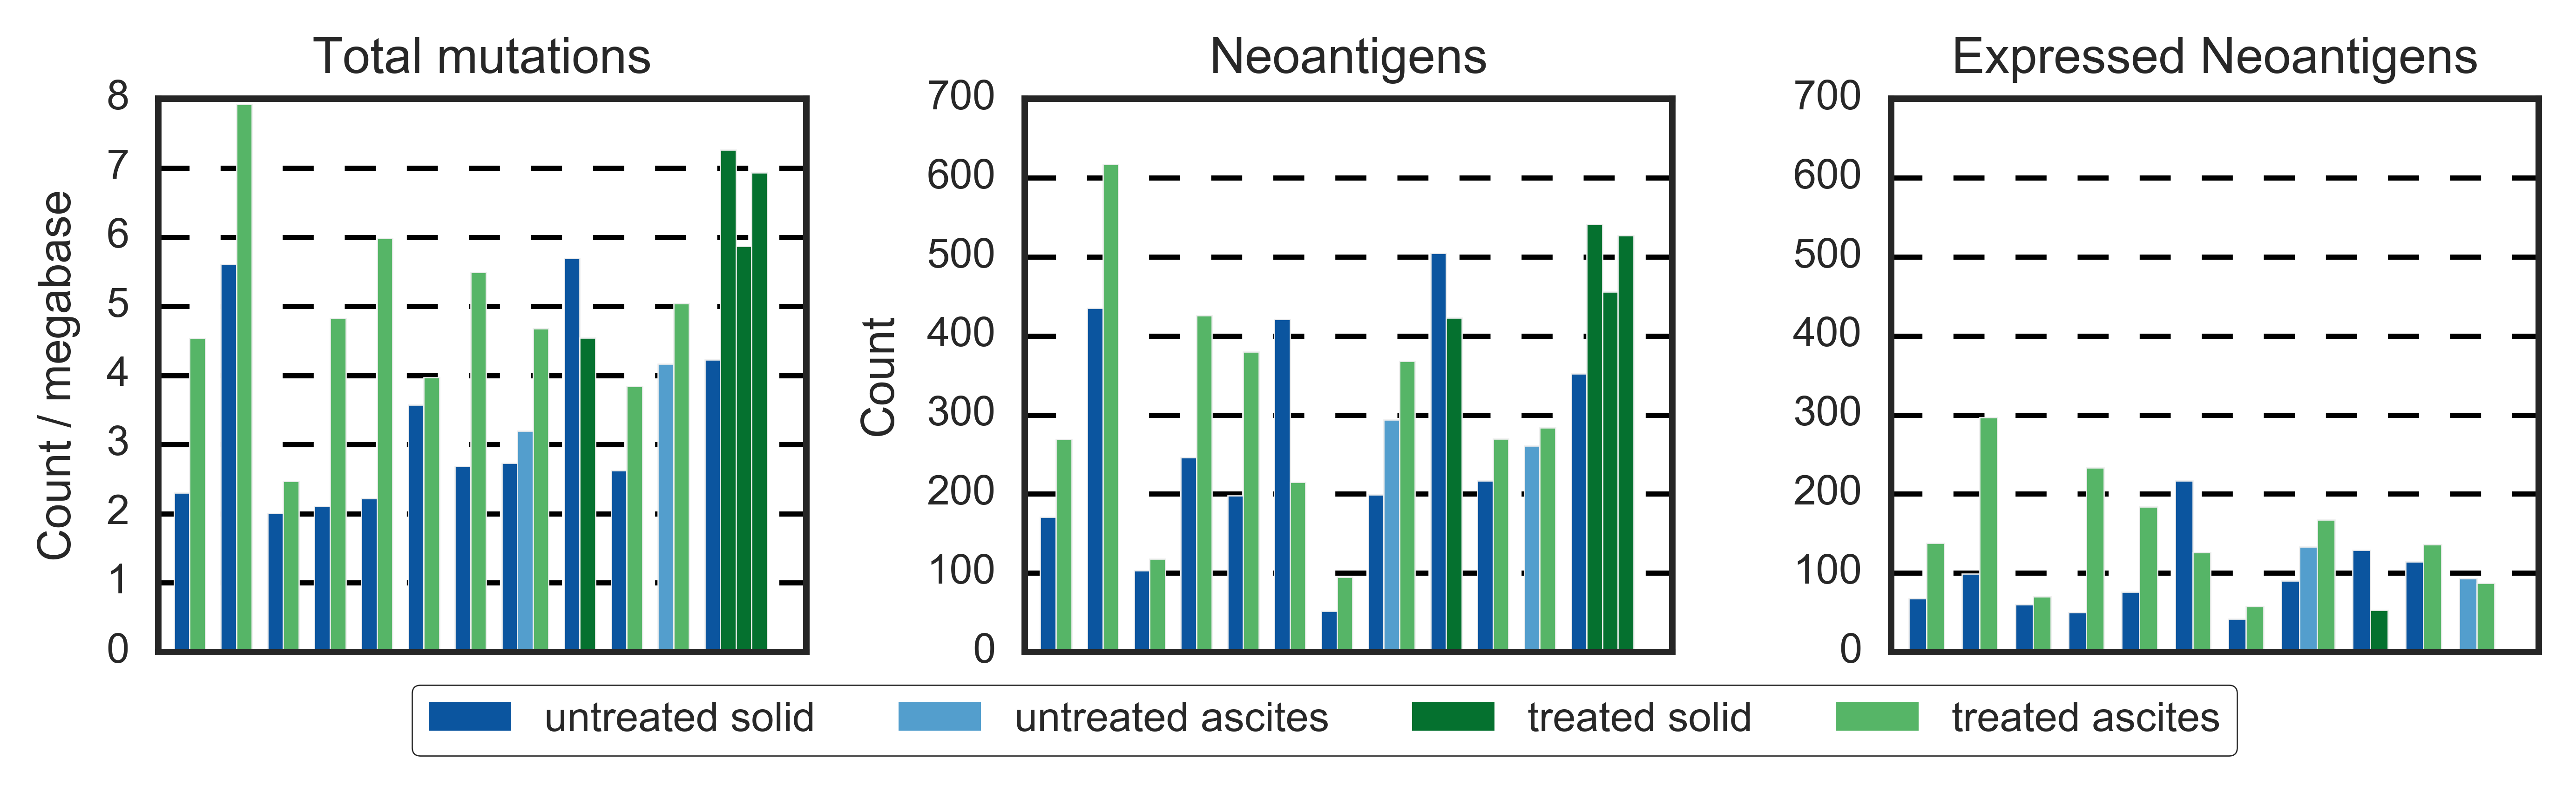

In [49]:
seaborn.set_context('poster')
## Paired analyses
sub_sources = sources.ix[sources.timepoint_paired]
sub_sources = sub_sources.ix[sources.cohort == "AOCS"]

fig = pyplot.figure(figsize=(7,2))
seaborn.set_context('paper')
grid=(1,3)

ax = pyplot.subplot2grid(grid,(0, 0))
plot_series(
    sub_sources.mutations_per_mb.dropna(),
    color_column='treated',
    legend_loc="lower center",
    legend_bbox_to_anchor=(1.8,-.225),
)
pyplot.title("Total mutations")
pyplot.ylabel("Count / megabase")
#pyplot.setp( ax.get_xticklabels(), visible=False)

ax = pyplot.subplot2grid(grid,(0, 1))
plot_series(sub_sources.peptides.dropna(), color_column='treated', legend=False)
pyplot.title("Neoantigens")
pyplot.ylabel("Count")


ax = pyplot.subplot2grid(grid,(0, 2), sharey=ax)
plot_series(sub_sources["expressed peptides"].dropna(), color_column='treated', legend=False)
pyplot.title("Expressed Neoantigens")
#pyplot.ylabel("Count")

pyplot.tight_layout()

pyplot.savefig("../figures/paired_counts.pdf")


In [50]:
df.groupby(["tissue_type", "treatment"])["neoantigens"].mean()
df.groupby(["tissue_type", "treatment"])["source_id"].unique()

tissue_type  treatment      
ascites      treated            [AOCS-034-13/SP101524, AOCS-064-13/SP101554, A...
             treatment naive    [AOCS-093-12/SP101636, AOCS-137-12/SP101866, A...
solid        treated            [AOCS-077-1/SP101572, AOCS-094-2/SP106641, AOC...
             treatment naive    [AOCS-001-1/SP101515, AOCS-004-1/SP101519, AOC...
Name: source_id, dtype: object

In [51]:
# Shared peptides
expressed_peptide_to_donor_to_index = collections.defaultdict(dict)
for (i, row) in muts_confident[muts_confident.rna_alt_reads > 2].iterrows():
    for (peptide, value) in row.binding_peptides.items():
        if value <= 500:
            expressed_peptide_to_donor_to_index[peptide][row.donor] = i
    
len(expressed_peptide_to_donor_to_index)

7398

In [52]:
# Shared peptides
peptide_to_donor_to_index = collections.defaultdict(dict)
for (i, row) in muts_confident.iterrows():
    for (peptide, value) in row.binding_peptides.items():
        if value <= 500:
            peptide_to_donor_to_index[peptide][row.donor] = i
    
len(peptide_to_donor_to_index)

20672

In [53]:
repeat_peptides = sorted(set(x for (x, donors) in peptide_to_donor_to_index.items() if len(donors) > 1))
len(repeat_peptides)

34

In [54]:
len(repeat_peptides) * 100.0 / len(peptide_to_donor_to_index)

0.16447368421052633

In [55]:
df = pandas.DataFrame({
        'peptide': repeat_peptides,
        'donors': [" ".join(peptide_to_donor_to_index[peptide]) for peptide in repeat_peptides],
        'indices': [
            list(itertools.chain(peptide_to_donor_to_index[peptide].values()))
            for peptide in repeat_peptides
        ]})
df["effects"] = [
    [muts_confident.ix[index].effect for index in row.indices]
    for (i, row) in df.iterrows()
]
df["genes"] = [
    [muts_confident.ix[index].gene for index in row.indices]
    for (i, row) in df.iterrows()
]
pandas.set_option('display.width', 1000)

print_full(df[["peptide", "genes", "effects"]])
df[["peptide", "donors", "genes", "effects"]]

        peptide                       genes                      effects
0   AAAAAAAAASA         [SKIDA1, DHFR MSH3]        [p.A317S, p.61insSAP]
1    AAAAAAAASA         [SKIDA1, DHFR MSH3]        [p.A317S, p.61insSAP]
2     AAAAAAASA         [SKIDA1, DHFR MSH3]        [p.A317S, p.61insSAP]
3     ALFVTWSTM            [MT-ND5, MT-ND5]           [p.I100T, p.I100T]
4      CPTTPAPL                [TP53, TP53]         [p.R249fs, p.T304fs]
5      CVFSLLAI  [DNMT1 S1PR2, DNMT1 S1PR2]           [p.S119C, p.S119C]
6    EIIHTGEKPY             [ZNF91, ZNF667]          [p.K1041E, p.R647I]
7     FVTWSTMEF            [MT-ND5, MT-ND5]           [p.I100T, p.I100T]
8    GLLAFWDSQV                [TP53, TP53]          [p.S106fs, p.A86fs]
9     HWMENISPF                [TP53, TP53]         [p.R249fs, p.T304fs]
10   ITLSACVFSL  [DNMT1 S1PR2, DNMT1 S1PR2]           [p.S119C, p.S119C]
11   LASNSCFIRY               [FRG1B, FRG1]            [p.C91Y, p.C159Y]
12   LFVTWSTMEF            [MT-ND5, MT-ND5]        

peptide                      donors                       genes                      effects
0   AAAAAAAAASA           AOCS-116 AOCS-168         [SKIDA1, DHFR MSH3]        [p.A317S, p.61insSAP]
1    AAAAAAAASA           AOCS-116 AOCS-168         [SKIDA1, DHFR MSH3]        [p.A317S, p.61insSAP]
2     AAAAAAASA           AOCS-116 AOCS-168         [SKIDA1, DHFR MSH3]        [p.A317S, p.61insSAP]
3     ALFVTWSTM           AOCS-115 AOCS-168            [MT-ND5, MT-ND5]           [p.I100T, p.I100T]
4      CPTTPAPL           AOCS-157 AOCS-064                [TP53, TP53]         [p.R249fs, p.T304fs]
5      CVFSLLAI           AOCS-166 AOCS-135  [DNMT1 S1PR2, DNMT1 S1PR2]           [p.S119C, p.S119C]
6    EIIHTGEKPY              AOCS-117 PT189             [ZNF91, ZNF667]          [p.K1041E, p.R647I]
7     FVTWSTMEF           AOCS-115 AOCS-168            [MT-ND5, MT-ND5]           [p.I100T, p.I100T]
8    GLLAFWDSQV           AOCS-123 AOCS-088                [TP53, TP53]          [p.S106fs, p.A86fs]
9     HWMENISPF           AOCS-157 AOCS-064                [TP53, TP53]         [p.R249fs, p.T304fs]
10   ITLSACVFSL           AOCS-166 AOCS-135  [DNMT1 S1PR2, DNMT1 S1PR2]           [p.S119C, p.S119C]
11   LASNSCFIRY              PT189 AOCS-115               [FRG1B, FRG1]            [p.C91Y, p.C159Y]
12   LFVTWSTMEF           AOCS-115 AOCS-168            [MT-ND5, MT-ND5]           [p.I100T, p.I100T]
13    LLAFWDSQV           AOCS-123 AOCS-088                [TP53, TP53]          [p.S106fs, p.A86fs]
14  LLASNSCFIRY              PT189 AOCS-115               [FRG1B, FRG1]            [p.C91Y, p.C159Y]
15  LLGRNSFEVHV           AOCS-106 AOCS-131                [TP53, TP53]           [p.R273H, p.R273H]
16  LLGRNSFEVLV          TCGA-0791 AOCS-081                [TP53, TP53]           [p.R273L, p.R273L]
17   LPSQRRNHWM           AOCS-157 AOCS-064                [TP53, TP53]         [p.R249fs, p.T304fs]
18    MAYDHYVAI           AOCS-113 AOCS-155              [OR4S1, OR1N1]           [p.R120H, p.R120H]
19  NLLGRNSFEVL          TCGA-0791 AOCS-081                [TP53, TP53]           [p.R273L, p.R273L]
20    RSVGVSASR           AOCS-157 AOCS-064                [TP53, TP53]         [p.R249fs, p.T304fs]
21     SQVCDLHV           AOCS-123 AOCS-088                [TP53, TP53]          [p.S106fs, p.A86fs]
22    SQVCDLHVL           AOCS-123 AOCS-088                [TP53, TP53]          [p.S106fs, p.A86fs]
23    STMEFSLWY           AOCS-115 AOCS-168            [MT-ND5, MT-ND5]           [p.I100T, p.I100T]
24   STMEFSLWYM           AOCS-115 AOCS-168            [MT-ND5, MT-ND5]           [p.I100T, p.I100T]
25     SVGVSASR           AOCS-157 AOCS-064                [TP53, TP53]         [p.R249fs, p.T304fs]
26     SVWASCIL           AOCS-134 AOCS-162                [TP53, TP53]           [p.S95fs, p.P85fs]
27    TLSACVFSL           AOCS-166 AOCS-135  [DNMT1 S1PR2, DNMT1 S1PR2]           [p.S119C, p.S119C]
28     TRAATVSV  AOCS-134 AOCS-162 AOCS-112          [TP53, TP53, TP53]  [p.S95fs, p.P85fs, p.S96fs]
29     VTIGGTSF           AOCS-057 AOCS-143              [OR5A1, OR5A1]           [p.V209I, p.V209I]
30    VTIGGTSFL           AOCS-057 AOCS-143              [OR5A1, OR5A1]           [p.V209I, p.V209I]
31  VTIGGTSFLQL           AOCS-057 AOCS-143              [OR5A1, OR5A1]           [p.V209I, p.V209I]
32     VTWSTMEF           AOCS-115 AOCS-168            [MT-ND5, MT-ND5]           [p.I100T, p.I100T]
33   VVVPCEPPEV           AOCS-057 AOCS-158                [TP53, TP53]           [p.Y220C, p.Y220C]

In [56]:
def mean_with_std(grouped_column, decimals=0):
    pattern = "%%0.%df" % decimals
    return [
        (pattern + " +/ " + pattern) % (m, s) if not pandas.isnull(s) else pattern % m
        for (m, s) in zip(grouped_column.mean(), grouped_column.std())
    ]

def means_with_errorbars(grouped_column, decimals=0):
    index = []
    values = []
    for (i, grouped) in grouped_column:
        index.append(i)
        values.append(mean_with_errorbars(grouped, decimals=decimals))
    return pandas.Series(values, index=index)
    
samples_with_rna = mutations.source_id.ix[mutations.rna_total_reads > 0].unique()

grouping_columns = ["cohort", "library", "tissue_type", "treated"]
grouped = sources.groupby(grouping_columns)

df = grouped.donor.nunique().to_frame() #.reset_index()
df["samples"] = grouped.donor.count().to_frame()["donor"]
df["samples with RNA"] = sources.ix[sources.index.isin(samples_with_rna)].groupby(grouping_columns).donor.count().to_frame()["donor"]
df["Mutations"] = means_with_errorbars(grouped.mutations)
#df["C(C>A)C percent"] = means_with_errorbars(grouped["interesting mutations"], decimals=2)
#df["Protein changing"] = means_with_errorbars(grouped["protein changing"])
df["Neoantigens"] = means_with_errorbars(grouped.peptides)
df["Expressed neoantigens"] = means_with_errorbars(grouped["expressed peptides"])


df = df.reset_index()
df["treated"] = df.treated.map({False: "untreated", True: "treated"})
#df["samples"] = ["%d (%d)" % (row.samples, row["samples with RNA"]) for (i, row) in df.iterrows()]
#del df["samples with RNA"]
df = df.rename(columns={
        "donor": "donors",
        "treated": "treatment",
#        "samples": "samples (with RNA)",
        "tissue_type": "tissue type",
    })

#df.to_csv("../data/cohort.csv")
df

cohort library tissue type  treatment  donors  samples  samples with RNA              Mutations      Neoantigens Expressed neoantigens
0   AOCS     WGS     ascites  untreated       4        4                 4   10336 (9600 - 11000)  205 (140 - 270)         82 (50 - 110)
1   AOCS     WGS     ascites    treated      22       25                20  13757 (12000 - 15000)  303 (260 - 350)       149 (120 - 180)
2   AOCS     WGS       solid  untreated      75       75                69     7902 (7000 - 8800)  166 (140 - 200)          70 (58 - 83)
3   AOCS     WGS       solid    treated       9       12                 5   11250 (8500 - 14000)  335 (220 - 460)          41 (28 - 52)

In [57]:
def calculate(sub_df):
    return pandas.DataFrame({
        "mutations change":
            [sub_df.ix[sub_df.treated].mutations.mean() / sub_df.ix[~ sub_df.treated].mutations.mean()],
        "neoantigens change":
            [sub_df.ix[sub_df.treated].peptides.mean() / sub_df.ix[~ sub_df.treated].peptides.mean()],
        "expressed neoantigens change":
            [sub_df.ix[sub_df.treated]["expressed peptides"].mean() / sub_df.ix[~ sub_df.treated]["expressed peptides"].mean()],
    })

ascites_change = bootstrap_mean_df(sources.ix[sources.tissue_type == "ascites"], calculate, "source_id")
print_full(ascites_change[0])

solid_change = bootstrap_mean_df(sources.ix[sources.tissue_type == "solid"], calculate, "source_id")
print_full(solid_change[0])


Removed 70 nan entires
  expressed neoantigens change  mutations change neoantigens change
0             1.99 (1.26-3.05)  1.34 (1.18-1.50)   1.55 (1.08-2.32)
Removed 27 nan entires
  expressed neoantigens change  mutations change neoantigens change
0             0.60 (0.41-0.79)  1.43 (1.11-1.76)   2.03 (1.37-2.68)


In [58]:
sources

donor cohort library treated   timepoint metastasis tissue_type  interval_days assay paired             source_id timepoint_paired  protein changing  peptides  expressed peptides  mutations  mutations_per_mb  indel  interesting mutations         group        treatment  fraction_peptides_expressed
source_id                                                                                                                                                                                                                                                                                                                         
AOCS-001-1/SP101515   AOCS-001   AOCS     WGS   False     primary      False       solid              0   WGS  False   AOCS-001-1/SP101515            False                50       128                  71       5937          1.977682      1              19.302678    AOCS solid  treatment naive                     0.554688
AOCS-002-1/SP101517   AOCS-002   AOCS     WGS   False     primary      False       solid              0   WGS  False   AOCS-002-1/SP101517            False                11        32                 NaN       1532          0.510326      0              17.297650    AOCS solid  treatment naive                          NaN
AOCS-004-1/SP101519   AOCS-004   AOCS     WGS   False     primary      False       solid              0   WGS  False   AOCS-004-1/SP101519            False                57        58                  20       6786          2.260493      1              16.931919    AOCS solid  treatment naive                     0.344828
AOCS-005-1/SP101521   AOCS-005   AOCS     WGS   False     primary      False       solid              0   WGS  False   AOCS-005-1/SP101521            False                39        61                  39       5703          1.899734      2              15.640891    AOCS solid  treatment naive                     0.639344
AOCS-034-13/SP101524  AOCS-034   AOCS     WGS    True  recurrence      False     ascites           1597   WGS   True  AOCS-034-13/SP101524             True               123       269                 138      13626          4.538974      5              17.906943  AOCS ascites    chemo treated                     0.513011
AOCS-034-1/SP101523   AOCS-034   AOCS     WGS   False     primary      False       solid              0   WGS   True   AOCS-034-1/SP101523             True                74       171                  68       6913          2.302798      4              18.429047    AOCS solid  treatment naive                     0.397661
AOCS-055-1/SP101526   AOCS-055   AOCS     WGS   False     primary      False       solid              0   WGS  False   AOCS-055-1/SP101526            False               116       178                  92      15112          5.033977      0              11.348597    AOCS solid  treatment naive                     0.516854
AOCS-056-1/SP101528   AOCS-056   AOCS     WGS   False     primary      False       solid              0   WGS  False   AOCS-056-1/SP101528            False                56       300                  16       7102          2.365756      1              20.909603    AOCS solid  treatment naive                     0.053333
AOCS-057-1/SP101530   AOCS-057   AOCS     WGS   False     primary      False       solid              0   WGS  False   AOCS-057-1/SP101530            False                45       156                 NaN       6201          2.065623      5              19.593614    AOCS solid  treatment naive                          NaN
AOCS-058-1/SP101532   AOCS-058   AOCS     WGS   False     primary      False       solid              0   WGS  False   AOCS-058-1/SP101532            False                89       158                  50       9199          3.064290      8              23.263398    AOCS solid  treatment naive                     0.316456
AOCS-059-1/SP101536   AOCS-059   AOCS     WGS   False     primary      False       solid              0   WGS  False   AOCS-059-1/SP101536           

In [72]:
# Write out extended sources
icgc_specimens = pandas.read_table("../data/specimen.tsv", index_col="icgc_specimen_id")

sources_extended = sources.copy()
sources_extended.index = [s.split("/")[1] for s in sources_extended.index]
sources_extended = sources_extended.merge(icgc_specimens, left_index=True, right_index=True)
sources_extended = sources_extended.dropna('columns', how='all').reset_index("source_id")
sources_extended.to_csv("../data/sources.extended.csv")
sources_extended.index = sources_extended.source_id
del sources_extended["source_id"]
sources_extended

index     donor cohort library treated   timepoint metastasis tissue_type  interval_days assay paired timepoint_paired  protein changing  peptides  expressed peptides  mutations  mutations_per_mb  indel  interesting mutations         group        treatment  fraction_peptides_expressed project_code study_specimen_involved_in submitted_specimen_id icgc_donor_id submitted_donor_id                                      specimen_type        specimen_type_other  specimen_interval specimen_donor_treatment_type specimen_donor_treatment_type_other specimen_processing     specimen_storage tumour_confirmed tumour_histological_type tumour_grading_system  tumour_grade tumour_stage_system tumour_stage  percentage_cellularity level_of_cellularity
source_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
AOCS-001-1/SP101515   SP101515  AOCS-001   AOCS     WGS   False     primary      False       solid              0   WGS  False            False                50       128                  71       5937          1.977682      1              19.302678    AOCS solid  treatment naive                     0.554688        OV-AU                      PCAWG            AOCS-001-1       DO46325           AOCS-001                      Primary tumour - solid tissue                        NaN                  0                  no treatment                                 NaN               fresh  frozen, vapor phase               no                   8441/3            Silverberg             3                FIGO          III                      73               61-80%
AOCS-002-1/SP101517   SP101517  AOCS-002   AOCS     WGS   False     primary      False       solid              0   WGS  False            False                11        32                 NaN       1532          0.510326      0              17.297650    AOCS solid  treatment naive                          NaN        OV-AU                      PCAWG            AOCS-002-1       DO46326           AOCS-002                      Primary tumour - solid tissue                        NaN                  0                  no treatment                                 NaN               fresh  frozen, vapor phase               no                   8441/3            Silverberg             2                FIGO          III                      85                 >81%
AOCS-004-1/SP101519   SP101519  AOCS-004   AOCS     WGS   False     primary      False       solid              0   WGS  False            False                57        58                  20       6786          2.260493      1              16.931919    AOCS solid  treatment naive                     0.344828        OV-AU                      PCAWG            AOCS-004-1       DO46327           AOCS-004                      Primary tumour - solid tissue                        NaN                  0                  no treatment                                 NaN               fresh  frozen, vapor phase               no                   8441/3            Silverberg             3                FIGO          III                      77               61-80%
AOCS-005-1/SP101521   SP101521  AOCS-005   AOCS     WGS   False     primary      False       solid              0   WGS  False            False                39        61                  39    

In [67]:
sources_extended.shape

(116, 42)